# Introduction

## Project Overview

## Data Information

## Data Dictionary

**Mood Tracker**

| **Feature**    | **Definition**                                                     |
|----------------|--------------------------------------------------------------------|
| **full_date**  | The year - month - day the entry was recorded                      |
| **date**       | The month - day the entry was recorded                              |
| **weekday**    | The day of the week the entry was recorded                          |
| **time**       | The time the entry was recorded                                    |
| **mood**       | The mood as recorded by the participant                             |
| **activities** | Daily activities as recorded by the participant                    |
| **note_title** | The title of the free-text note as recorded by the participant     |
| **note**       | Free-text entries made by the participant                           |


**Sleep Tracker**

| **Feature**               | **Definition**                                                         |
|---------------------------|------------------------------------------------------------------------|
| **Start**                  | The time the user turned the app on                                    |
| **End**                    | The time the user woke up                                              |
| **Sleep Quality**          | A calculated value of the quality of sleep provided by the app          |
| **Regularity**             | A measurement of the consistency of bedtimes and wakeup times over time |
| **Mood**                   | Mood as recorded by the participant                                     |
| **Heart rate (bpm)**       | The participant's heart rate (bpm)                                      |
| **Steps**                  | The number of steps the participant took                                |
| **Alarm mode**             | Whether an alarm was or wasn't set                                      |
| **Air Pressure (Pa)**      | The air pressure where the participant was sleeping (Pa)               |
| **City**                   | The city where the participant was sleeping                             |
| **Movements per hour**     | The number of movements made by the participant per hour                |
| **Time in bed (seconds)**  | The amount of time spent in bed (seconds)                               |
| **Time asleep (seconds)**  | The amount of time spent asleep (seconds)                               |
| **Time before sleep (seconds)** | The amount of time the participant was in bed before they fell asleep (seconds) |
| **Window start**           | The start time of the set gradual wake-up alarm                         |
| **Window stop**            | The end time of the set gradual wake-up alarm                           |
| **Did snore**              | Whether snoring activity was recorded during the sleep                  |
| **Snore time**             | The amount of time the participant spent snoring                        |
| **Weather temperature (°F)** | The temperature of the location where the participant slept            |
| **Weather type**           | The type of weather in the location where the participant was sleeping |
| **Notes**                  | Free-text notes recorded by the participant

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Checks versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 2.2.3
numpy version: 1.23.5


## Loading the Data

In [3]:
# Reads in the documents
mood_tracker_orig = pd.read_excel("daylio_export_2025_02_05.xlsx")
sleep_tracker_orig = pd.read_excel("sleepdata.xlsx")

In [4]:
display(mood_tracker_orig.head())
display(sleep_tracker_orig.head())

,full_date,date,weekday,time,mood,activities,note_title,note
0,2025-02-04,2025-02-04 00:00:00,Tuesday,22:12:00,good,work | relax | movies | Writing | really good ...,NaN,NaN
1,2025-02-03,2025-02-03 00:00:00,Monday,21:35:00,bad,movies | travel | bad sleep,NaN,NaN
2,2025-02-02,2025-02-02 00:00:00,Sunday,21:57:00,good,family | good meal | travel,NaN,NaN
3,2025-02-01,2025-02-01 00:00:00,Saturday,22:22:00,good,family | travel | Hike | something fun,NaN,NaN
4,2025-01-31,2025-01-31 00:00:00,Friday,20:12:00,good,travel | bad sleep | date | something fun,NaN,NaN


,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°F),Weather type,Notes
0,2020-04-25 00:07:13,2020-04-25 07:44:31,0.78,0.00,NaN,0,0,Normal,96.1,NaN,...,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,0.0,32,No weather,NaN
1,2020-04-26 01:24:33,2020-04-26 09:14:20,0.71,0.00,NaN,0,0,Normal,97.3,NaN,...,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0,32,No weather,NaN
2,2020-04-26 23:30:09,2020-04-27 06:55:40,0.64,0.65,NaN,0,0,Normal,97.4,NaN,...,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,0.0,32,No weather,NaN
3,2020-04-27 23:27:10,2020-04-28 06:13:03,0.79,0.79,NaN,0,0,Normal,96.9,NaN,...,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,0.0,32,No weather,NaN
4,2020-04-28 22:11:09,2020-04-29 06:38:02,0.75,0.81,NaN,0,0,Normal,96.3,NaN,...,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,0.0,32,No weather,NaN


# EDA

## Exploring Mood Tracker Data

To explore the mood tracker data, the data types for each column will be determined. The date ranges available for full_date and date columns will also be described. The unique values for mood will be determined. Activities will also be separated into their own columns so the number of unique values can be seen. Then missing values will be explored and addressed.

In [5]:
display(mood_tracker_orig.head())
rows, columns = mood_tracker_orig.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

,full_date,date,weekday,time,mood,activities,note_title,note
0,2025-02-04,2025-02-04 00:00:00,Tuesday,22:12:00,good,work | relax | movies | Writing | really good ...,NaN,NaN
1,2025-02-03,2025-02-03 00:00:00,Monday,21:35:00,bad,movies | travel | bad sleep,NaN,NaN
2,2025-02-02,2025-02-02 00:00:00,Sunday,21:57:00,good,family | good meal | travel,NaN,NaN
3,2025-02-01,2025-02-01 00:00:00,Saturday,22:22:00,good,family | travel | Hike | something fun,NaN,NaN
4,2025-01-31,2025-01-31 00:00:00,Friday,20:12:00,good,travel | bad sleep | date | something fun,NaN,NaN


Number of rows: 1858
Number of columns: 8


In [6]:
# Data type for each column
print(mood_tracker_orig.dtypes)

full_date     datetime64[ns]
date                  object
weekday               object
time                  object
mood                  object
activities            object
note_title           float64
note                  object
dtype: object


In [7]:
print("Earliest full_date:", mood_tracker_orig['full_date'].min())
print("Latest full_date:  ", mood_tracker_orig['full_date'].max())

Earliest full_date: 2019-12-19 00:00:00
Latest full_date:   2025-02-04 00:00:00


After review of the date column in excel, it is formatted as 'Feb 2' but with an underlying date. Because of the lack of year, Excel has assigned the year 2025 to every entry. The date column will be dropped and full_date used instead.

In [8]:
# Unique values for the mood column
print("Unique moods:", mood_tracker_orig['mood'].unique())
print("Number of unique moods:", mood_tracker_orig['mood'].nunique())

Unique moods: ['good' 'bad' 'meh' 'rad' 'awful']
Number of unique moods: 5


In [9]:
# Split the activities into individual items and flatten the list
unique_activities = set(mood_tracker_orig['activities'].dropna().str.split('|').explode().str.strip())

In [10]:
# Print unique activities
display("Unique activities:", unique_activities)

# Print the count of unique activities
print("Number of unique activities:", len(unique_activities))

'Unique activities:'

{'Don’t feel good',
 'Gym',
 'Hike',
 'Language',
 'Megan',
 'Phone call',
 'Pool/Water',
 'Racing Thoughts',
 'SMART',
 'Sports',
 'Stocks',
 'Writing',
 'bad sleep',
 'car trouble',
 'cleaning',
 'date',
 'drinking',
 'errands',
 'family',
 'friends',
 'gaming',
 'good meal',
 'house stuff',
 'movies',
 'nap',
 'negative self talk',
 'no megan',
 'party',
 'phone rabbit hole',
 'reading',
 'really good sleep',
 'relax',
 'shopping',
 'something fun',
 'therapy',
 'travel',
 'urges',
 'work',
 'work from home'}

Number of unique activities: 39


#### Summary of Data:

full_date Range: 12/19/2019 - 02/04/2025

date: will be dropped

weekday: 7 unique values possible

time: time data was entered in 24 hr format

mood: 5 unique values possible

activies: 39 unique values possible

note title: Check percentage of NaN

note: Check percentage of NaN

### Missing Values

In [11]:
# Calculate non-NaN counts and NaN percentages
non_nan_counts = mood_tracker_orig.notna().sum()
nan_percentage = mood_tracker_orig.isna().mean() * 100

In [12]:
# Print the results for each column
for column in mood_tracker_orig.columns:
    print(f"Column: {column}")
    print(f"  Non-NaN Count: {non_nan_counts[column]}")
    print(f"  NaN Percentage: {nan_percentage[column]:.2f}%")
    print("-" * 40)  # Separator for readability

Column: full_date
  Non-NaN Count: 1858
  NaN Percentage: 0.00%
----------------------------------------
Column: date
  Non-NaN Count: 1858
  NaN Percentage: 0.00%
----------------------------------------
Column: weekday
  Non-NaN Count: 1858
  NaN Percentage: 0.00%
----------------------------------------
Column: time
  Non-NaN Count: 1858
  NaN Percentage: 0.00%
----------------------------------------
Column: mood
  Non-NaN Count: 1858
  NaN Percentage: 0.00%
----------------------------------------
Column: activities
  Non-NaN Count: 1858
  NaN Percentage: 0.00%
----------------------------------------
Column: note_title
  Non-NaN Count: 0
  NaN Percentage: 100.00%
----------------------------------------
Column: note
  Non-NaN Count: 36
  NaN Percentage: 98.06%
----------------------------------------


The note_title and note columns will also be dropped along with the date column.

### Restructuring the Data Frame

Each activity will be moved in to its own column and one hot encoded. The note_title, note and date columns will also be dropped at this time.

In [13]:
mood_tracker_encoded = mood_tracker_orig.copy()

In [14]:
# Drop the columns
mood_tracker_encoded = mood_tracker_encoded.drop(columns=["date", "note_title", "note"])

In [15]:
rows, columns = mood_tracker_encoded.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 1858
Number of columns: 5


In [16]:
# Standardize the activity names by stripping spaces
mood_tracker_encoded['activities'] = mood_tracker_encoded['activities'].str.replace(r'\s*\|\s*', '|', regex=True)

In [17]:
# One-hot encode activities 
one_hot_activities = mood_tracker_encoded['activities'].str.get_dummies(sep='|')

# Rename the columns to add 'activity ' prefix
one_hot_activities.columns = ['activity ' + col for col in one_hot_activities.columns]

# Concatenate the one-hot encoded activities with the original dataframe
mood_tracker_encoded = pd.concat([mood_tracker_encoded.drop(columns=['activities']), one_hot_activities], axis=1)

In [18]:
display(mood_tracker_encoded.head())

,full_date,weekday,time,mood,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,...,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home
0,2025-02-04,Tuesday,22:12:00,good,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,2025-02-03,Monday,21:35:00,bad,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2025-02-02,Sunday,21:57:00,good,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2025-02-01,Saturday,22:22:00,good,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2025-01-31,Friday,20:12:00,good,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [19]:
print(mood_tracker_encoded.columns)

Index(['full_date', 'weekday', 'time', 'mood', 'activity Don’t feel good',
       'activity Gym', 'activity Hike', 'activity Language', 'activity Megan',
       'activity Phone call', 'activity Pool/Water',
       'activity Racing Thoughts', 'activity SMART', 'activity Sports',
       'activity Stocks', 'activity Writing', 'activity bad sleep',
       'activity car trouble', 'activity cleaning', 'activity date',
       'activity drinking', 'activity errands', 'activity family',
       'activity friends', 'activity gaming', 'activity good meal',
       'activity house stuff', 'activity movies', 'activity nap',
       'activity negative self talk', 'activity no megan', 'activity party',
       'activity phone rabbit hole', 'activity reading',
       'activity really good sleep', 'activity relax', 'activity shopping',
       'activity something fun', 'activity therapy', 'activity travel',
       'activity urges', 'activity work', 'activity work from home'],
      dtype='object')


In [20]:
# Summary information for all columns
print(mood_tracker_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   full_date                    1858 non-null   datetime64[ns]
 1   weekday                      1858 non-null   object        
 2   time                         1858 non-null   object        
 3   mood                         1858 non-null   object        
 4   activity Don’t feel good     1858 non-null   int64         
 5   activity Gym                 1858 non-null   int64         
 6   activity Hike                1858 non-null   int64         
 7   activity Language            1858 non-null   int64         
 8   activity Megan               1858 non-null   int64         
 9   activity Phone call          1858 non-null   int64         
 10  activity Pool/Water          1858 non-null   int64         
 11  activity Racing Thoughts     1858 non-null 

### Categorizing Mood Values

The mood values are ordinal with awful being the worst mood type and rad being the best. Eventually, they will also be encoded but for easier visualization they will be ordered and displayed in the proper order from worst - best.

In [21]:
# Define the ordered mapping directly
mood_mapping = {'awful': 1, 'bad': 2, 'meh': 3, 'good': 4, 'rad': 5}

# Map moods to numerical values directly
mood_tracker_encoded['mood_numeric'] = mood_tracker_encoded['mood'].map(mood_mapping).astype(int)

In [22]:
# Verify the data type
print(mood_tracker_encoded['mood_numeric'].dtype) 

# Verify the data type
print(mood_tracker_encoded['mood_numeric'].unique()) 

int32
[4 2 3 5 1]


### Visualizations

#### Mood

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
# Define the color palette for moods
mood_colors = {
    'awful': 'red',
    'bad': 'gray',
    'meh': 'purple',
    'good': 'green',
    'rad': 'blue'
}

In [26]:
# Define the order for moods

mood_order = ['awful', 'bad', 'meh', 'good', 'rad']

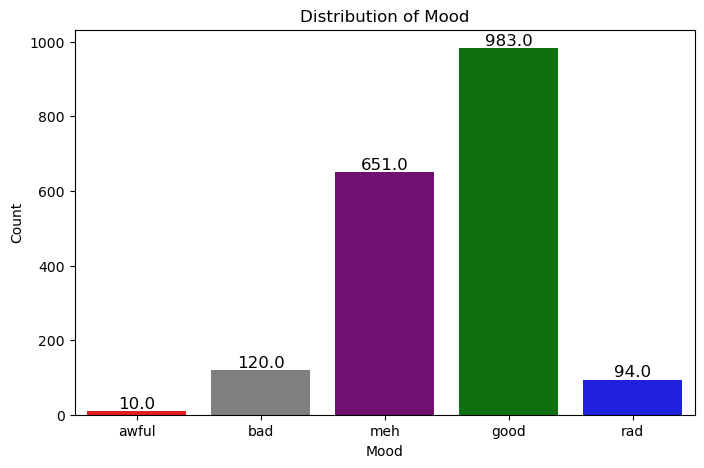

In [27]:
# Plot the distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=mood_tracker_encoded, x='mood', order=mood_order, palette=mood_colors)

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Label axes
plt.xlabel('Mood')
plt.ylabel('Count')
plt.title('Distribution of Mood')

# Save the figure to the local directory 
plt.savefig("mood_distribution_histogram.png", dpi=300, bbox_inches="tight")

plt.show()

There is a class imbalance in the target variable. This will need to be handled for model building.

In [28]:
# Extract the year
mood_tracker_encoded['year'] = mood_tracker_encoded['full_date'].dt.year

In [29]:
# Group by year and mood, then count occurrences
mood_counts_by_year = mood_tracker_encoded.groupby(['year', 'mood']).size().unstack(fill_value=0)

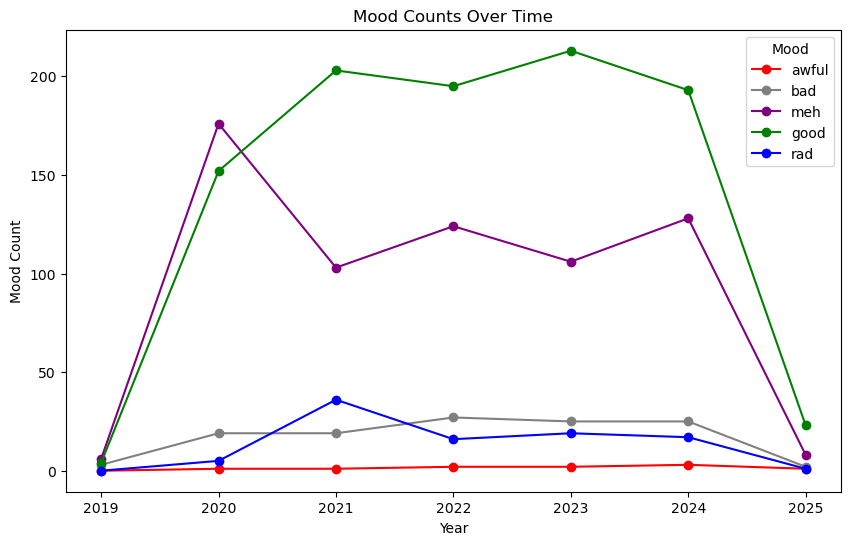

In [30]:
# Plot line chart
plt.figure(figsize=(10, 6))

for mood in mood_order:
    plt.plot(mood_counts_by_year.index, mood_counts_by_year[mood], marker='o', label=mood, color = mood_colors[mood])

# Formatting
plt.xlabel("Year")
plt.ylabel("Mood Count")
plt.title("Mood Counts Over Time")
plt.legend(title="Mood")

# Save the figure to the local directory 
plt.savefig("mood_counts_over_time.png", dpi=300, bbox_inches="tight")

plt.show()

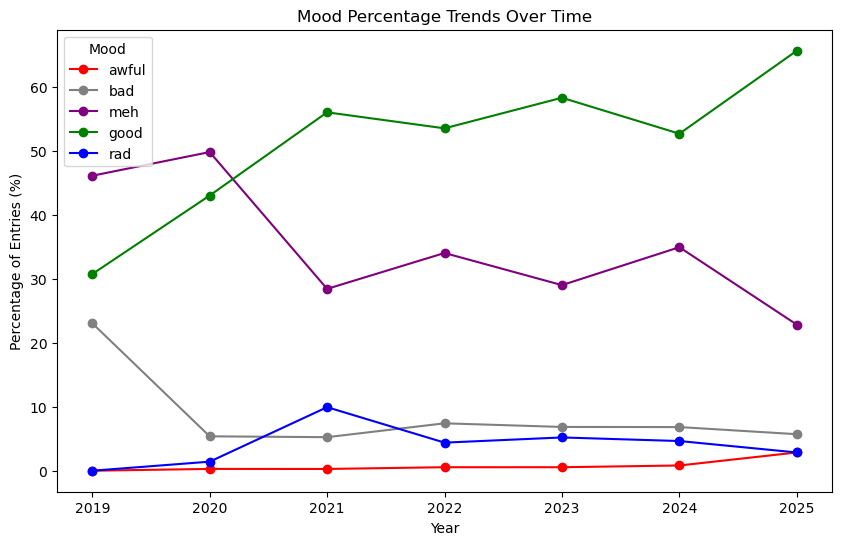

In [31]:
# Convert counts to percentages
mood_percentages_by_year = mood_counts_by_year.div(mood_counts_by_year.sum(axis=1), axis=0) * 100

# Plot line chart for percentages
plt.figure(figsize=(10, 6))

for mood in mood_order:
    plt.plot(mood_percentages_by_year.index, mood_percentages_by_year[mood], marker='o', label=mood, color = mood_colors[mood])

# Formatting
plt.xlabel("Year")
plt.ylabel("Percentage of Entries (%)")
plt.title("Mood Percentage Trends Over Time")
plt.legend(title="Mood")

# Save the figure to the local directory
plt.savefig("mood_trends_over_time.png", dpi=300, bbox_inches="tight")

plt.show()

The user was much more likely to record their mood as being 'meh' or 'good' than any of the other moods. This trend did not change over time, although they were more likely to record 'meh' than 'good' in the years 2019-2020.

#### Activities

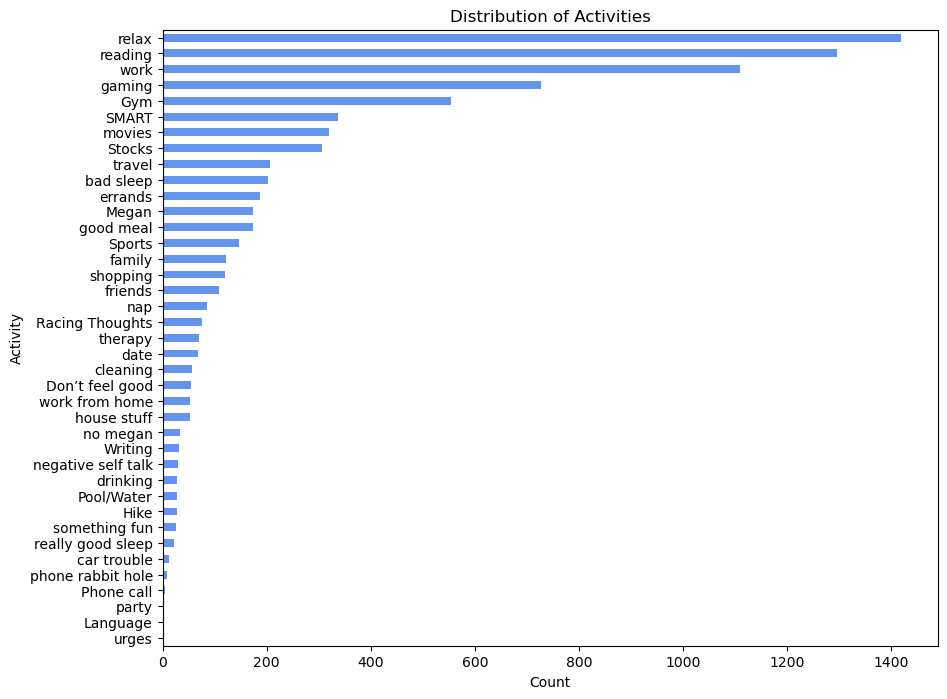

In [32]:
# Select only the activity columns 
activity_columns = [col for col in mood_tracker_encoded.columns if 'activity ' in col]

# Sum the values of each activity column to get the total count
activity_counts = mood_tracker_encoded[activity_columns].sum()

# Temporarily remove the 'activity ' prefix for the plot
activity_counts.index = activity_counts.index.str.replace('activity ', '')

# Plot the distribution of activities as a horizontal bar chart
plt.figure(figsize=(10, 8))
activity_counts.sort_values().plot(kind='barh', color='cornflowerblue')

# Add labels and title
plt.ylabel("Activity")
plt.xlabel("Count")
plt.title("Distribution of Activities")

# Save the figure to the local directory 
plt.savefig("distribution_of_activities.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

The user recorded three activities: relax, reading and work far more than they did any other activity.

#### Mood by Weekday

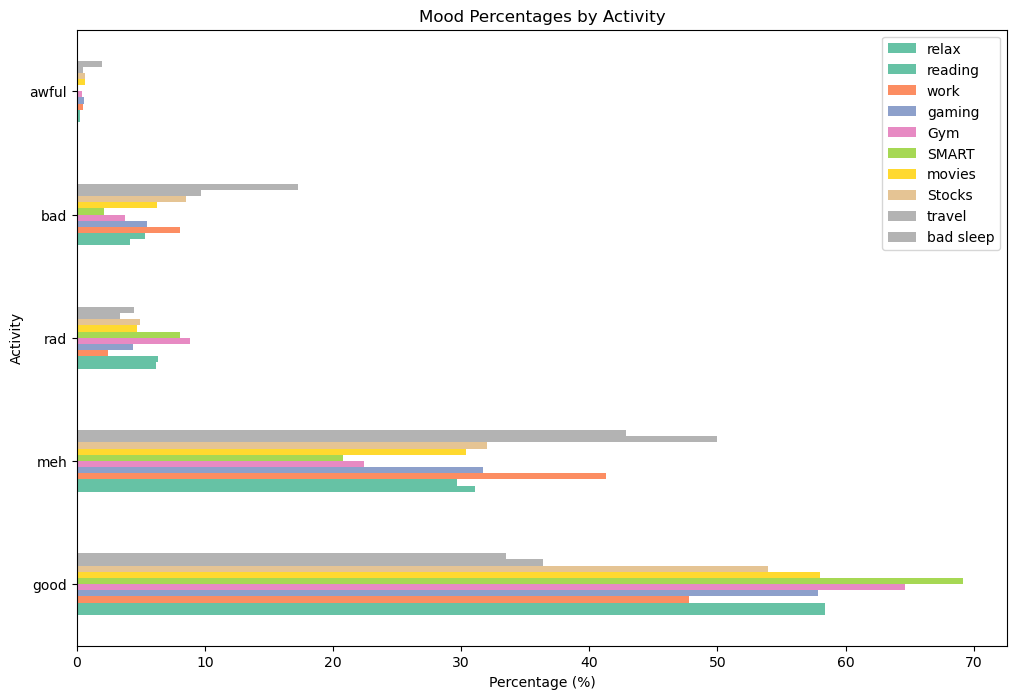

In [33]:
# Select the top 10 activities by count
top_10_activity_columns = mood_tracker_encoded[activity_columns].sum().nlargest(10).index

# Create a cross-tabulation of activities by mood
mood_activity_crosstab = pd.DataFrame()

# For each activity, calculate the percentage of each mood
for activity in top_10_activity_columns:
    activity_data = mood_tracker_encoded[mood_tracker_encoded[activity] == 1]
    mood_counts = activity_data['mood'].value_counts(normalize=True) * 100
    mood_activity_crosstab[activity] = mood_counts

# Rename columns to remove 'activity '
mood_activity_crosstab.columns = [col.replace('activity ', '') for col in mood_activity_crosstab.columns]

# Plot the distribution of mood percentages for each activity
mood_activity_crosstab.plot(kind='barh', figsize=(12, 8), cmap='Set2')

# Add labels and title
plt.xlabel("Percentage (%)")
plt.ylabel("Activity")
plt.title("Mood Percentages by Activity")

# Save the figure to the local directory 
plt.savefig("mood_percentages_by_activity.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

Approximately 65% of the time that the recorded mood was 'good', the activity 'gym' was also recorded. The activity 'SMART' was recorded 70% of the time that the 'good' mood was recorded. The 'bad sleep' activity was recorded 45% of the time a 'meh' rating was given and 20% of the time a 'bad' mood was recorded.

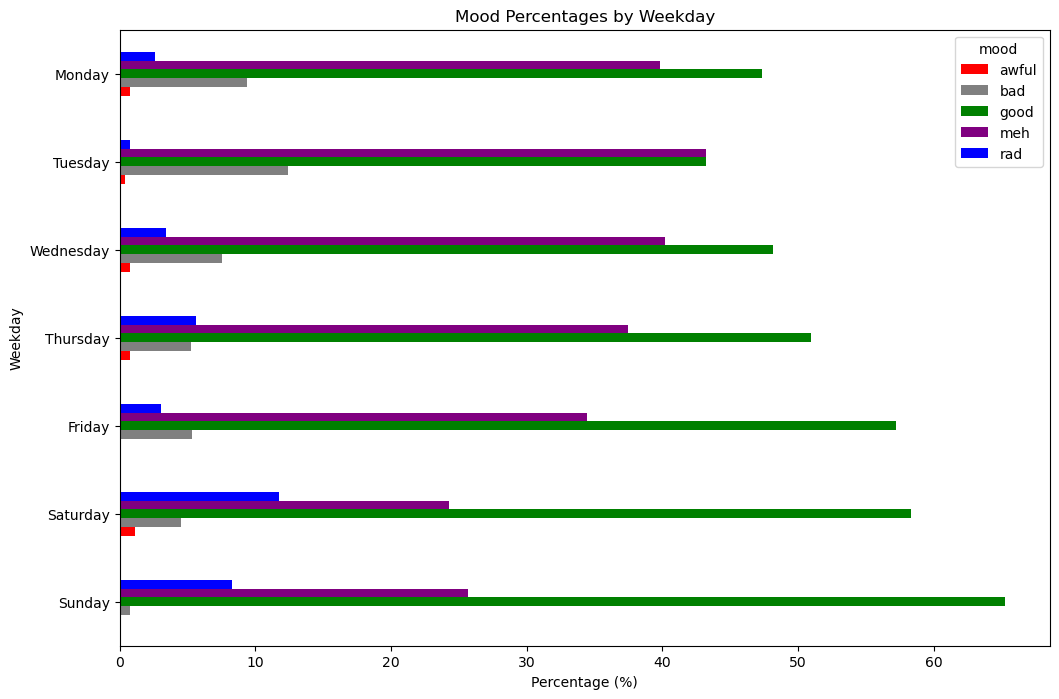

In [34]:
# Ensure 'weekday' is a categorical type with the correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mood_tracker_encoded['weekday'] = pd.Categorical(mood_tracker_encoded['weekday'], categories=weekday_order, ordered=True)

# Reverse the order of the weekdays so Monday appears at the top
weekday_order_reversed = list(reversed(weekday_order))
mood_tracker_encoded['weekday'] = pd.Categorical(mood_tracker_encoded['weekday'], categories=weekday_order_reversed, ordered=True)

# Create a cross-tabulation of mood by weekday
weekday_mood_crosstab = pd.crosstab(mood_tracker_encoded['weekday'], mood_tracker_encoded['mood'])

# Normalize by rows to get the percentage
weekday_mood_crosstab_percentage = weekday_mood_crosstab.div(weekday_mood_crosstab.sum(axis=1), axis=0) * 100

# Plot the mood distribution for each weekday (with mood on the y-axis)
weekday_mood_crosstab_percentage.plot(kind='barh', figsize=(12, 8), color=mood_colors)

# Add labels and title
plt.xlabel("Percentage (%)")
plt.ylabel("Weekday")
plt.title("Mood Percentages by Weekday")

# Save the figure to the local directory 
plt.savefig("mood_percentages_by_weekday.png", dpi=300, bbox_inches="tight")


# Show plot
plt.show()

'Good' seems to have been recorded at a high frequency across all weekdays. The 'meh' mood was less likely to be recorded on a Saturday or Sunday. The overall percentage of 'bad' was low across the dataset, but they occured most frequently on Mondays and Tuesdays. 'Rad' also had a much lower count but when it was recorded, it was most likly a Saturday or Sunday.

### Encoding Weekday Values

To simplify merging the current mood dataset with the sleep dataset, the weekdays will be encoded now using ordinal encoding. 

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
# Ordinal Encoding for 'weekday' (0 for Monday, 6 for Sunday)
encoder = OrdinalEncoder(categories=[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']])
mood_tracker_encoded['weekday_encoded'] = encoder.fit_transform(mood_tracker_encoded[['weekday']])

### Dropping the time column

The time column will not be used in modeling and so is being dropped from the dataset

In [37]:
# Drop the 'time' column 
mood_tracker_encoded = mood_tracker_encoded.drop(columns=['time'])

In [38]:
display(mood_tracker_encoded.head())

,full_date,weekday,mood,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,...,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,year,weekday_encoded
0,2025-02-04,Tuesday,good,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,4,2025,1.0
1,2025-02-03,Monday,bad,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,2025,0.0
2,2025-02-02,Sunday,good,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4,2025,6.0
3,2025-02-01,Saturday,good,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,4,2025,5.0
4,2025-01-31,Friday,good,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,4,2025,4.0


The current dataframe now includes:

full_date: Will be used to merge with sleep dataframe

weekday: Will eventually be removed but may be used for visualizations

mood: Will eventually be removed but will help with further visualization readability

* The activities columns, weekday and mood have all been encoded, although not all of the original columns have been dropped yet.

* There are no known missing values in the dataset.

* For future: Class imbalance in the mood variable will need to be handled before modeling.

## Exploring Sleep Tracker Data

In [39]:
display(sleep_tracker_orig.head())
rows, columns = sleep_tracker_orig.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°F),Weather type,Notes
0,2020-04-25 00:07:13,2020-04-25 07:44:31,0.78,0.00,NaN,0,0,Normal,96.1,NaN,...,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,0.0,32,No weather,NaN
1,2020-04-26 01:24:33,2020-04-26 09:14:20,0.71,0.00,NaN,0,0,Normal,97.3,NaN,...,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0,32,No weather,NaN
2,2020-04-26 23:30:09,2020-04-27 06:55:40,0.64,0.65,NaN,0,0,Normal,97.4,NaN,...,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,0.0,32,No weather,NaN
3,2020-04-27 23:27:10,2020-04-28 06:13:03,0.79,0.79,NaN,0,0,Normal,96.9,NaN,...,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,0.0,32,No weather,NaN
4,2020-04-28 22:11:09,2020-04-29 06:38:02,0.75,0.81,NaN,0,0,Normal,96.3,NaN,...,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,0.0,32,No weather,NaN


Number of rows: 1713
Number of columns: 21


In [40]:
# Data type for each column
print(sleep_tracker_orig.dtypes)

Start                          datetime64[ns]
End                            datetime64[ns]
Sleep Quality                         float64
Regularity                            float64
Mood                                   object
Heart rate (bpm)                        int64
Steps                                   int64
Alarm mode                             object
Air Pressure (Pa)                     float64
City                                   object
Movements per hour                    float64
Time in bed (seconds)                 float64
Time asleep (seconds)                 float64
Time before sleep (seconds)           float64
Window start                   datetime64[ns]
Window stop                    datetime64[ns]
Did snore                                bool
Snore time                            float64
Weather temperature (°F)                int64
Weather type                           object
Notes                                  object
dtype: object


### Numerical Columns

In [41]:
# Summary statistics for numerical columns
print(sleep_tracker_orig.describe())

                               Start                            End  \
count                           1713                           1713   
mean   2022-09-15 17:02:58.785755904  2022-09-16 01:14:33.742557184   
min              2020-04-25 00:07:13            2020-04-25 07:44:31   
25%              2021-06-26 23:39:48            2021-06-27 08:44:51   
50%              2022-09-15 22:23:00            2022-09-16 07:04:37   
75%              2023-12-14 22:02:53            2023-12-15 07:03:11   
max              2025-02-04 22:13:18            2025-02-05 06:04:56   
std                              NaN                            NaN   

       Sleep Quality   Regularity  Heart rate (bpm)   Steps  \
count    1713.000000  1713.000000            1713.0  1713.0   
mean        0.843158     0.881763               0.0     0.0   
min         0.040000    -0.480000               0.0     0.0   
25%         0.790000     0.860000               0.0     0.0   
50%         0.860000     0.910000            

The summary statistics make it clear that there are multiple columns that do not contain meaningful information. Their values are either always consistent or they do not contain values. The following columns will be removed from the dataframe.

- Heart rate (bpm)

- Steps

- Weather temperature (°F)

It is interesting to note that the min for Time before sleep and Time asleep is 0.0. This seems unlikely as the participant has to turn the app on. It could possibly be due to a missing value that was recorded as a 0. It is also possible the app was unable to record data during those times. This will need further investigation.

Unique values will be checked for the categorical columns to investigate their validity.

In [42]:
# Iterate through all columns of type object and display unique values
for column in sleep_tracker_orig.select_dtypes(include=['object']).columns:
    unique_values = sleep_tracker_orig[column].unique()
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")

Unique values for 'Mood':
[nan 'OK' 'Bad' 'Good']


Unique values for 'Alarm mode':
['Normal' 'No alarm']


Unique values for 'City':
[nan 'Rogers' 'Cape Town' 'Leawood' 'Arlington' 'Springdale' 'Little Rock'
 'Las Vegas' 'Tampa' 'Belton' 'Milwaukee' 'Río Grande' 'Topeka'
 'Crystal River']


Unique values for 'Weather type':
['No weather']


Unique values for 'Notes':
[nan 'Nap' 'Worked out' 'Melatonin' 'Melatonin:Worked out']




It appears the column 'Weather type' only contains one unique value. This column will also be dropped from the dataframe.

The Mood feature will also be dropped and values from the other dataframe used instead.

In [43]:
columns_to_drop = ["Weather type", "Heart rate (bpm)", "Steps", "Weather temperature (°F)", "Mood"]

In [44]:
sleep_tracker_dropped = sleep_tracker_orig.copy()

In [45]:
# Drop the specified columns 
sleep_tracker_dropped = sleep_tracker_orig.drop(columns=columns_to_drop)

In [46]:
rows, columns = sleep_tracker_dropped.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 1713
Number of columns: 16


### Missing Values

In [47]:
# Summary information for all columns
print(sleep_tracker_dropped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        1713 non-null   datetime64[ns]
 1   End                          1713 non-null   datetime64[ns]
 2   Sleep Quality                1713 non-null   float64       
 3   Regularity                   1713 non-null   float64       
 4   Alarm mode                   1713 non-null   object        
 5   Air Pressure (Pa)            1713 non-null   float64       
 6   City                         389 non-null    object        
 7   Movements per hour           1713 non-null   float64       
 8   Time in bed (seconds)        1713 non-null   float64       
 9   Time asleep (seconds)        1713 non-null   float64       
 10  Time before sleep (seconds)  1713 non-null   float64       
 11  Window start                 1149 non-null 

The Notes feature only contains 8 entries and the City feature 389. Both of these will be dropped from the dataframe. 

There are missing values for Window start and Window stop as well. This may make sense if the missing values correclate to Alarm mode = 'No alarm' as they record the beginning and ending alarm times. This will need to be verified. 

In [48]:
# Drop the specified columns 
sleep_tracker_dropped = sleep_tracker_dropped.drop(columns = ["City", "Notes"])

In [49]:
rows, columns = sleep_tracker_dropped.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

print(sleep_tracker_dropped.info())

Number of rows: 1713
Number of columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        1713 non-null   datetime64[ns]
 1   End                          1713 non-null   datetime64[ns]
 2   Sleep Quality                1713 non-null   float64       
 3   Regularity                   1713 non-null   float64       
 4   Alarm mode                   1713 non-null   object        
 5   Air Pressure (Pa)            1713 non-null   float64       
 6   Movements per hour           1713 non-null   float64       
 7   Time in bed (seconds)        1713 non-null   float64       
 8   Time asleep (seconds)        1713 non-null   float64       
 9   Time before sleep (seconds)  1713 non-null   float64       
 10  Window start                 1149 non-null   datetime64[ns]
 11  

## Visualizations

First, the distributions of the categorical columns will be analyzed. Then the categorical columns will be.

### Numerical Features

In [50]:
# Select only the float64 columns from the dataframe
float_columns = sleep_tracker_dropped.select_dtypes(include=['float64']).columns

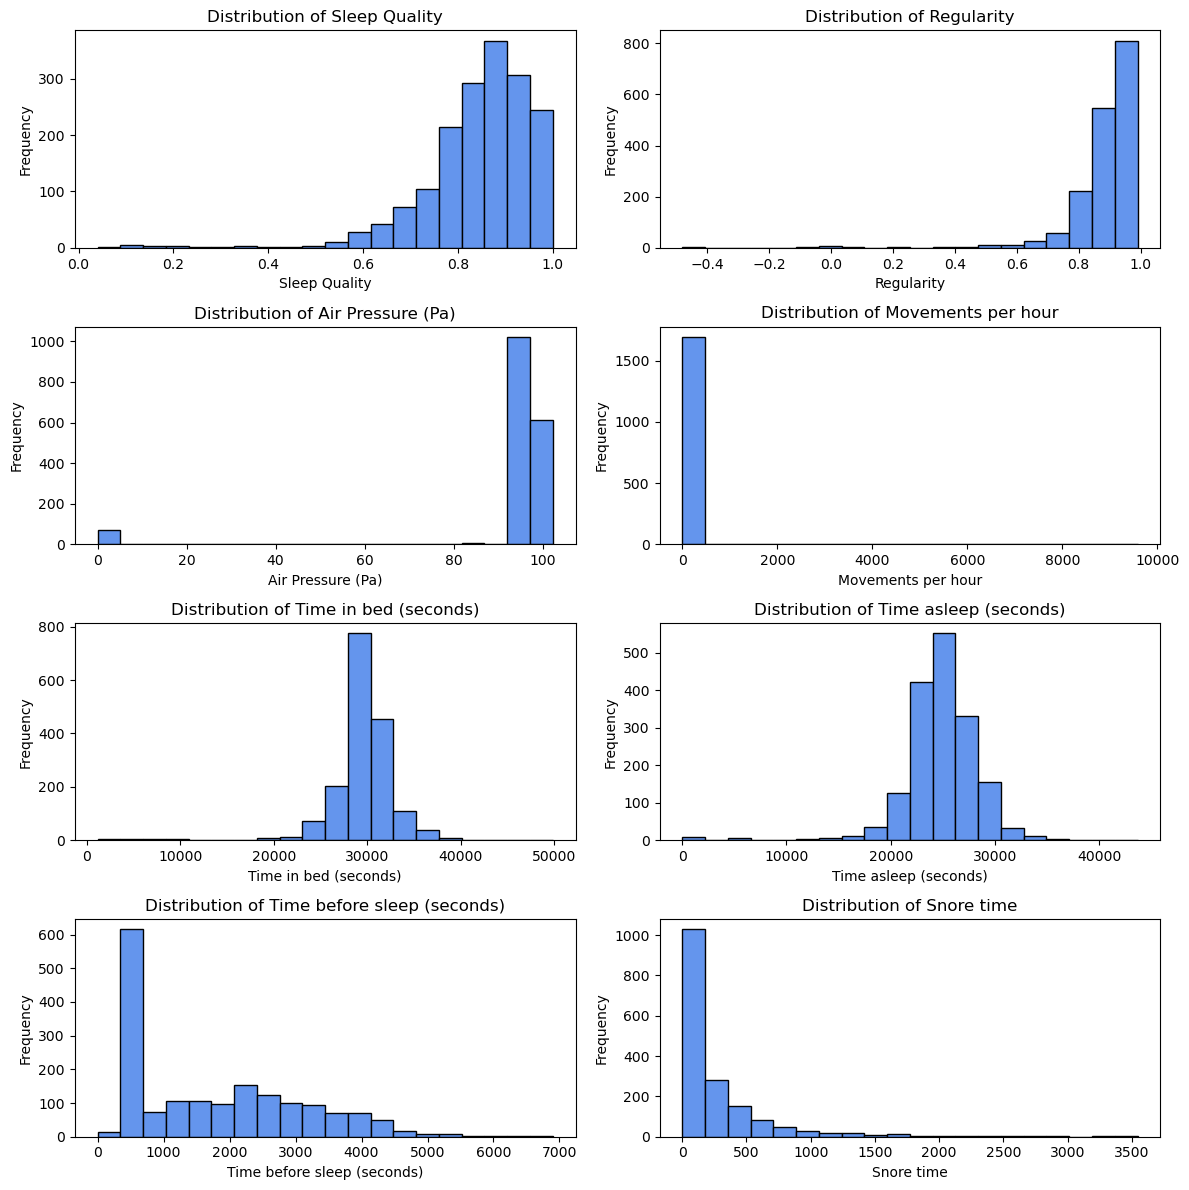

In [51]:
# Number of rows needed for the subplots
num_rows = (len(float_columns) + 1) // 2

# Create subplots with two columns and taller aspect ratio
plt.figure(figsize=(12, 12))  # Adjust height for box-like appearance

# Loop through each float64 column and plot the distribution
for i, column in enumerate(float_columns, 1):
    plt.subplot(num_rows, 2, i)  # Adjusting for two columns
    sleep_tracker_dropped[column].hist(bins=20, color='cornflowerblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)  # Remove grid lines

# Adjust layout
plt.tight_layout()

# Save the figure to the local directory 
plt.savefig("sleep_numerical_distribution.png", dpi=300, bbox_inches="tight")

# Show plots
plt.show()

Sleep Quality, Regularity and Air Pressure are all heavily negatively skewed with lower valued outliers. 

Movements per hour is interesting because only one bar appears on the chart.

Time in bed and Time asleep both appear to be normally distributed with few outliers.

Time before sleep has a large outlier between 250-500 seconds. Values appear to vary greatly.

Snore time also has a large peak between 0-250 seconds and some possible outliers in the 3500 seconds range.

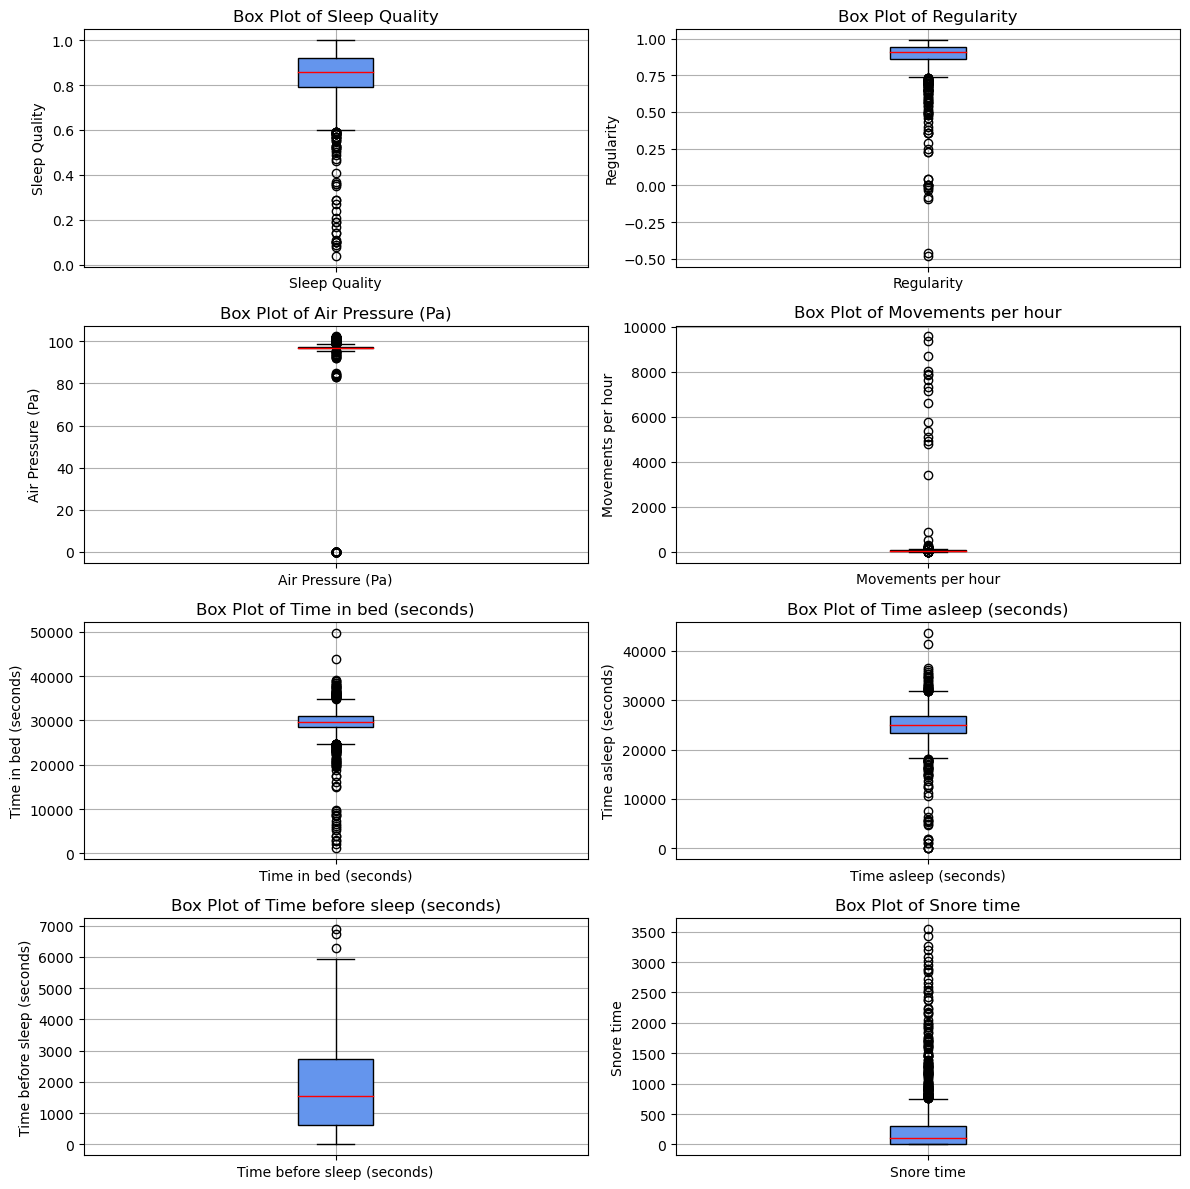

In [52]:
# Number of rows needed for the subplots
num_rows = (len(float_columns) + 1) // 2

# Create subplots with two columns and taller aspect ratio
plt.figure(figsize=(12, 12))  # Adjust height for box-like appearance

# Loop through each float64 column and plot the box plot
for i, column in enumerate(float_columns, 1):
    plt.subplot(num_rows, 2, i)  # Adjusting for two columns
    sleep_tracker_dropped.boxplot(column=column, vert=True, patch_artist=True,
                                  boxprops=dict(facecolor="cornflowerblue", color="black"),
                                  whiskerprops=dict(color="black"),
                                  capprops=dict(color="black"),
                                  medianprops=dict(color="red"))

    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()

# Save the figure to the local directory
plt.savefig("sleep_numerical_boxplots.png", dpi=300, bbox_inches="tight")

# Show plots
plt.show()

The box and whisker plots show many outliers for almost every feature from the sleep dataset. These will need to be checked for their potential impact on future modeling.

In [53]:
display(sleep_tracker_dropped.describe())

,Start,End,Sleep Quality,Regularity,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time
count,1713,1713,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1149,1149,1713.000000
mean,2022-09-15 17:02:58.785755904,2022-09-16 01:14:33.742557184,0.843158,0.881763,92.995797,129.529480,29490.753473,24846.312084,1815.995914,2022-09-15 05:35:56.553524992,2022-09-15 06:05:36.031331840,264.451255
min,2020-04-25 00:07:13,2020-04-25 07:44:31,0.040000,-0.480000,0.000000,0.000000,1164.900000,0.000000,0.000000,2020-04-25 09:50:00,2020-04-25 10:20:00,0.000000
25%,2021-06-26 23:39:48,2021-06-27 08:44:51,0.790000,0.860000,96.600000,47.400000,28552.600000,23323.100000,609.000000,2021-06-30 06:15:00,2021-06-30 06:45:00,0.000000
50%,2022-09-15 22:23:00,2022-09-16 07:04:37,0.860000,0.910000,96.900000,62.800000,29614.900000,24915.400000,1542.800000,2022-09-21 07:38:00,2022-09-21 08:05:00,113.500000
75%,2023-12-14 22:02:53,2023-12-15 07:03:11,0.920000,0.940000,97.400000,78.800000,31089.800000,26734.300000,2747.200000,2023-12-05 06:40:00,2023-12-05 07:10:00,303.100000
max,2025-02-04 22:13:18,2025-02-05 06:04:56,1.000000,0.990000,102.300000,9582.300000,49826.300000,43681.000000,6898.200000,2025-02-05 06:15:00,2025-02-05 06:45:00,3544.800000
std,NaN,NaN,0.123915,0.123256,19.530684,675.223197,3623.139920,3747.364998,1281.342438,NaN,NaN,445.284534


In [54]:
# Select only numerical columns
numerical_cols = sleep_tracker_dropped.select_dtypes(include=['float64', 'int64'])

In [55]:
# Compute median and mode for each column
median_values = numerical_cols.median()
mode_values = numerical_cols.mode().iloc[0]  

# Calculate absolute difference
median_mode_diff = (median_values - mode_values).abs()

# Identify columns where median is significantly different from mode 
threshold = median_values.median() * 0.1  
significant_diff = median_mode_diff[median_mode_diff > threshold]

# Display results
significant_diff

Movements per hour                62.8
Time in bed (seconds)            170.0
Time asleep (seconds)          24915.4
Time before sleep (seconds)     1542.8
Snore time                       113.5
dtype: float64

The features above have medians that are more than 10% different than their modes. This is a potential indicator of high skewness or kurtosis that could eventually affect the model performance.

#### Skewness & Kurtosis

In [56]:
import scipy.stats as stats

In [57]:
# Compute statistics
skewness = numerical_cols.skew()
kurtosis = numerical_cols.kurtosis()

# Combine into a DataFrame
stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
display(stats_df)

,Skewness,Kurtosis
Sleep Quality,-2.263333,9.485615
Regularity,-4.944645,35.880729
Air Pressure (Pa),-4.534714,18.691664
Movements per hour,11.040669,125.281668
Time in bed (seconds),-2.793134,18.685040
Time asleep (seconds),-1.879710,11.743916
Time before sleep (seconds),0.728587,-0.348512
Snore time,3.382444,14.552236


These features all show high skewness and kurtosis. Their correlations with the target variable will first be verified before a determination is made of how to handle the distributions.

### Categorical & Boolean Features

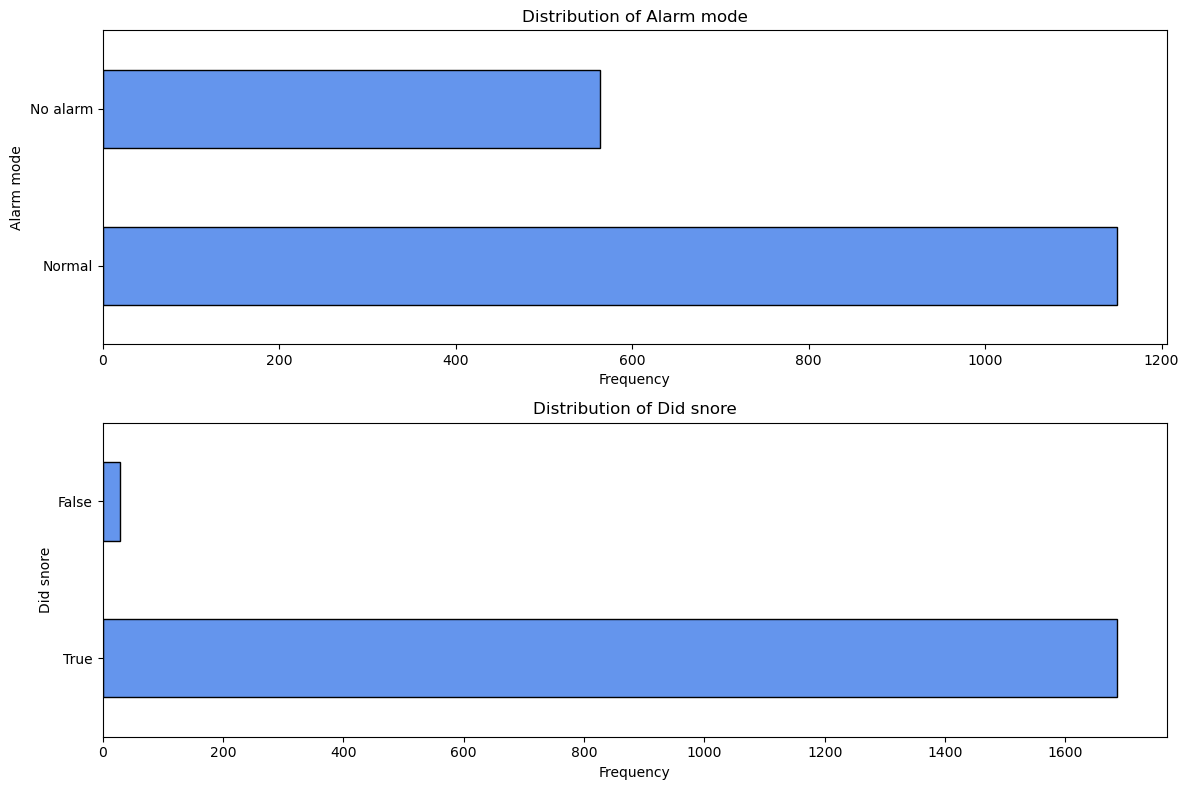

In [58]:
# Specify the columns you want to plot
columns_to_plot = ['Alarm mode', 'Did snore']

# Create a figure for the horizontal bar charts
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 1, i)  # Two rows, one column of plots
    sleep_tracker_dropped[column].value_counts().plot(kind='barh', color='cornflowerblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel("Frequency")
    plt.ylabel(column)
    plt.grid(False)
    
# Adjust layout and show the plots
plt.tight_layout()
plt.show()

'No alarm' has a frequency of approximately half that of normal. If this column is useful, it could be converted to boolean instead of directly encoding.

The app registered snoring far more often than it did not. 

## Missing Values Revisited

During initial investigation, the minimum values for several features was shown as being zero. This needs to be reviewed more thoroughly.

In [59]:
# Count the number of zeros in each column
zero_counts = (sleep_tracker_dropped == 0).sum()

# Filter and display only features with 1 or more zeros
zero_counts_filtered = zero_counts[zero_counts >= 1]

# Print the result
print(zero_counts_filtered)

Regularity                       4
Air Pressure (Pa)               72
Movements per hour              13
Time asleep (seconds)            4
Time before sleep (seconds)      4
Did snore                       28
Snore time                     500
dtype: int64


#### Regularity

There are 4 instances where regularity is zero. This may make sense if they occurred when the user started using the app as regularity is a derived feature calculated by the application that uses patterns in its formula.

In [60]:
# Filter rows where Regularity is 0
regularity_zero_dates = sleep_tracker_dropped[sleep_tracker_dropped['Regularity'] == 0]['End']

# Print the filtered dates
print(regularity_zero_dates)

0      2020-04-25 07:44:31
1      2020-04-26 09:14:20
615    2022-01-02 06:17:32
1328   2024-02-01 06:29:37
Name: End, dtype: datetime64[ns]


The first two missing values did occur when the app was first being used. The other two seem random. 

In [61]:
# Calculate and print min, max, and median 
regularity_min = sleep_tracker_dropped['Regularity'].min()
regularity_max = sleep_tracker_dropped['Regularity'].max()
regularity_median = sleep_tracker_dropped['Regularity'].median()

print(f"Min: {regularity_min}")
print(f"Max: {regularity_max}")
print(f"Median: {regularity_median}")

Min: -0.48
Max: 0.99
Median: 0.91


The range of regularity suggests that it may be possible for 0 to be a valid regularity score. 

#### Air Pressure (Pa)

A value of 0 for air pressure would never be valid. Summary statistics will be reviewed to determine imputation method. 

In [62]:
# Calculate and print min, max, and median 
air_pressure_min = sleep_tracker_dropped['Air Pressure (Pa)'].min()
air_pressure_max = sleep_tracker_dropped['Air Pressure (Pa)'].max()
air_pressure_median = sleep_tracker_dropped['Air Pressure (Pa)'].median()
air_pressure_mean = sleep_tracker_dropped['Air Pressure (Pa)'].mean()

print(f"Min: {air_pressure_min}")
print(f"Max: {air_pressure_max}")
print(f"Median: {air_pressure_median}")
print(f"Median: {air_pressure_mean}")

Min: 0.0
Max: 102.3
Median: 96.9
Median: 92.99579684763572


In [63]:
# Remove rows where 'Air Pressure (Pa)' is 0
air_pressure_non_zero = sleep_tracker_dropped[sleep_tracker_dropped['Air Pressure (Pa)'] != 0]

# Calculate and print min, max, and median for 'Air Pressure (Pa)' without 0 values
air_pressure_non_zero_min = air_pressure_non_zero['Air Pressure (Pa)'].min()
air_pressure_non_zero_max = air_pressure_non_zero['Air Pressure (Pa)'].max()
air_pressure_non_zero_median = air_pressure_non_zero['Air Pressure (Pa)'].median()
air_pressure_non_zero_mean = air_pressure_non_zero['Air Pressure (Pa)'].mean()

print(f"Min (without 0 values): {air_pressure_non_zero_min}")
print(f"Max (without 0 values): {air_pressure_non_zero_max}")
print(f"Median (without 0 values): {air_pressure_non_zero_median}")
print(f"Mean (without 0 values): {air_pressure_non_zero_mean}")

Min (without 0 values): 83.2
Max (without 0 values): 102.3
Median (without 0 values): 97.0
Mean (without 0 values): 97.07605118829981


Without the 0 values, the median and mean are very close to one another. 0 values will be imputed with the mean.

In [64]:
sleep_tracker_imputed = sleep_tracker_dropped.copy()

In [65]:
# Round the mean to 1 decimal place
air_pressure_mean_rounded = round(air_pressure_non_zero_mean, 1)

# Impute the 0 values in 'Air Pressure (Pa)' with the rounded mean value
sleep_tracker_imputed['Air Pressure (Pa)'] = sleep_tracker_imputed['Air Pressure (Pa)'].replace(0, air_pressure_mean_rounded)

In [66]:
# Check if any 0 values remain in 'Air Pressure (Pa)'
zero_values_remaining = (sleep_tracker_imputed['Air Pressure (Pa)'] == 0).sum()
print(f"Number of 0 values remaining in 'Air Pressure (Pa)': {zero_values_remaining}")

Number of 0 values remaining in 'Air Pressure (Pa)': 0


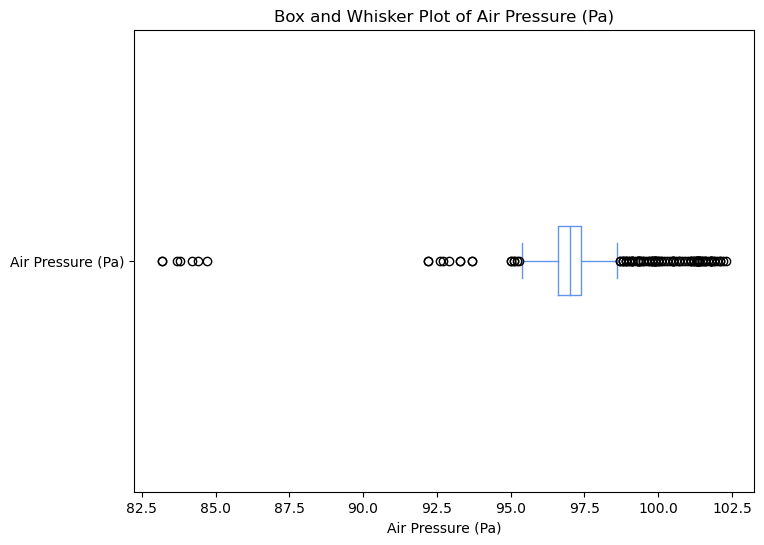

In [67]:
# Plot a box and whisker plot for 'Air Pressure (Pa)'
plt.figure(figsize=(8, 6))
sleep_tracker_imputed['Air Pressure (Pa)'].plot(kind='box', vert=False, color='cornflowerblue')
plt.title('Box and Whisker Plot of Air Pressure (Pa)')
plt.xlabel('Air Pressure (Pa)')
plt.show()

There are still outliers for this feature, however there are no longer any 0s.

#### Movements per Hour

While it is possible to have a Movements per Hour count of 0, the fact that there are only 13 instances of this make this seem unlikely.

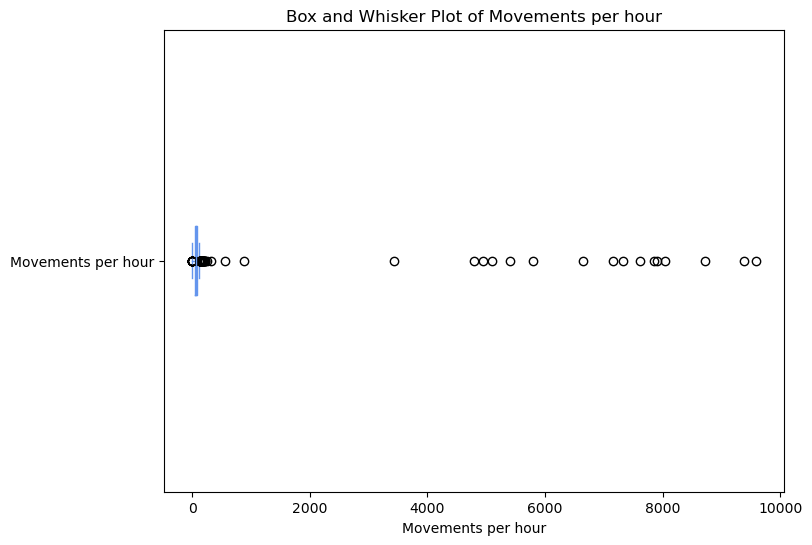

In [68]:
# Plot a box and whisker plot
plt.figure(figsize=(8, 6))
sleep_tracker_imputed['Movements per hour'].plot(kind='box', vert=False, color='cornflowerblue')
plt.title('Box and Whisker Plot of Movements per hour')
plt.xlabel('Movements per hour')
plt.show()

In [69]:
# Calculate and print min, max, and median 
movements_min = sleep_tracker_imputed['Movements per hour'].min()
movements_max = sleep_tracker_imputed['Movements per hour'].max()
movements_median = sleep_tracker_imputed['Movements per hour'].median()
movements_mean = sleep_tracker_imputed['Movements per hour'].mean()

print(f"Min: {movements_min}")
print(f"Max: {movements_max}")
print(f"Median: {movements_median}")
print(f"Mean: {movements_mean}")

Min: 0.0
Max: 9582.3
Median: 62.8
Mean: 129.52948044366607


Upon further investigation it seems the 0 entries may be more valid than the extreme outliers. These will be left as is.

#### Time asleep (seconds)

In [70]:
# Calculate and print min, max, and median 
time_asleep_min = sleep_tracker_imputed['Time asleep (seconds)'].min()
time_asleep_max = sleep_tracker_imputed['Time asleep (seconds)'].max()
time_asleep_median = sleep_tracker_imputed['Time asleep (seconds)'].median()
time_asleep_mean = sleep_tracker_imputed['Time asleep (seconds)'].mean()

print(f"Min: {time_asleep_min}")
print(f"Max: {time_asleep_max}")
print(f"Median: {time_asleep_median}")
print(f"Mean: {time_asleep_mean}")

Min: 0.0
Max: 43681.0
Median: 24915.4
Mean: 24846.312084063044


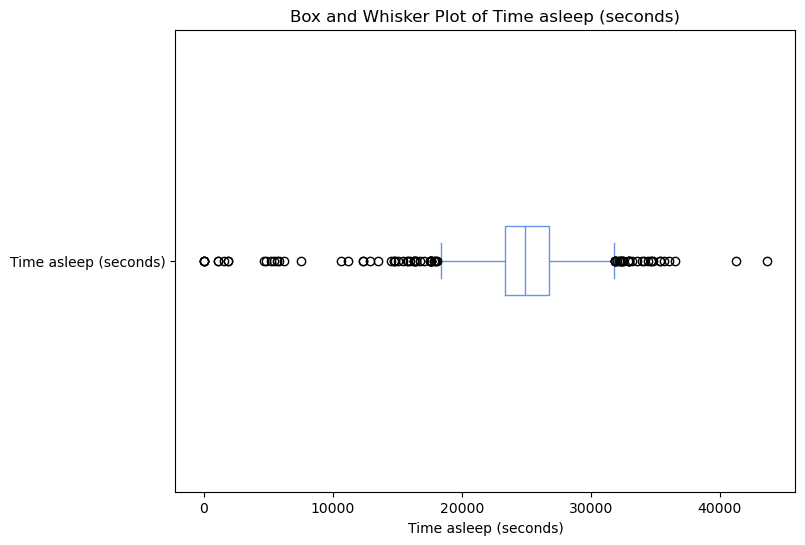

In [71]:
# Plot a box and whisker plot
plt.figure(figsize=(8, 6))
sleep_tracker_imputed['Time asleep (seconds)'].plot(kind='box', vert=False, color='cornflowerblue')
plt.title('Box and Whisker Plot of Time asleep (seconds)')
plt.xlabel('Time asleep (seconds)')
plt.show()

While there are many outliers for this feature, there are only 4 instances of a 0 value. The mean and median are close to one another, so the 0 values will be imputed with the mean. This should not significantly affect the overall distribution.

In [72]:
# Round the mean to 1 decimal place
time_asleep_mean_rounded = round(time_asleep_mean, 1)

# Impute the 0 values with the rounded mean value
sleep_tracker_imputed['Time asleep (seconds)'] = sleep_tracker_imputed['Time asleep (seconds)'].replace(0, time_asleep_mean_rounded)

In [73]:
# Check if any 0 values remain 
zero_values_remaining = (sleep_tracker_imputed['Time asleep (seconds)'] == 0).sum()
print(f"Number of 0 values remaining in Time asleep (seconds)': {zero_values_remaining}")

Number of 0 values remaining in Time asleep (seconds)': 0


#### Time before sleep (seconds)

In [74]:
# Calculate and print min, max, and median 
time_before_min = sleep_tracker_imputed['Time before sleep (seconds)'].min()
time_before_max = sleep_tracker_imputed['Time before sleep (seconds)'].max()
time_before_median = sleep_tracker_imputed['Time before sleep (seconds)'].median()
time_before_mean = sleep_tracker_imputed['Time before sleep (seconds)'].mean()

print(f"Min: {time_before_min}")
print(f"Max: {time_before_max}")
print(f"Median: {time_before_median}")
print(f"Mean: {time_before_mean}")

Min: 0.0
Max: 6898.2
Median: 1542.8
Mean: 1815.995913601868


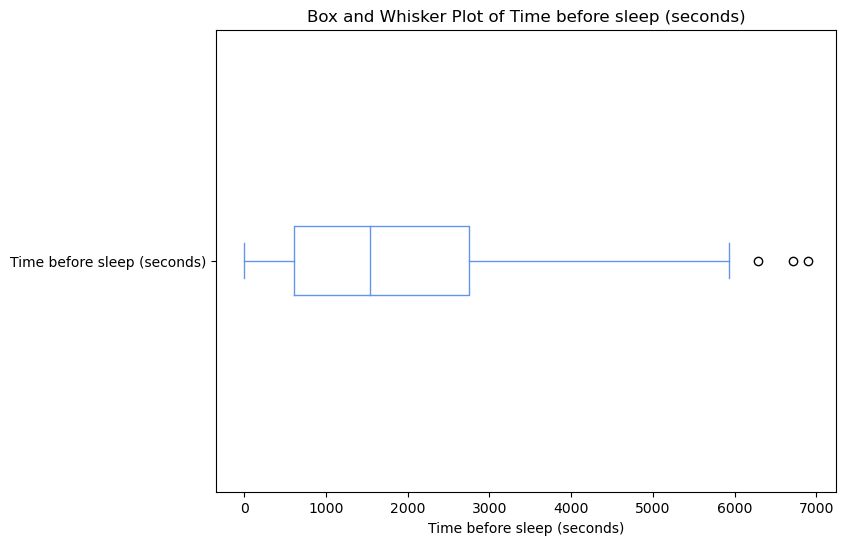

In [75]:
# Plot a box and whisker plot
plt.figure(figsize=(8, 6))
sleep_tracker_imputed['Time before sleep (seconds)'].plot(kind='box', vert=False, color='cornflowerblue')
plt.title('Box and Whisker Plot of Time before sleep (seconds)')
plt.xlabel('Time before sleep (seconds)')
plt.show()

In [76]:
# Impute the 0 values with the rounded mean value
sleep_tracker_imputed['Time before sleep (seconds)'] = sleep_tracker_imputed['Time before sleep (seconds)'].replace(0, time_before_median)

In [77]:
# Check if any 0 values remain
zero_values_remaining = (sleep_tracker_imputed['Time before sleep (seconds)'] == 0).sum()
print(f"Number of 0 values remaining in Time before sleep (seconds)': {zero_values_remaining}")

Number of 0 values remaining in Time before sleep (seconds)': 0


The median was used for imputation because it is less affected by the extreme outliers as seen in the box and whisker plot.

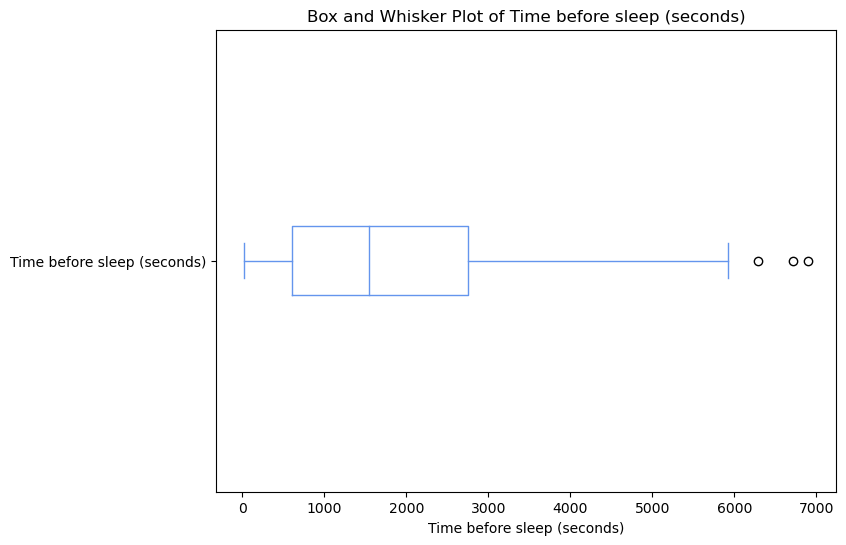

In [78]:
# Plot a box and whisker plot
plt.figure(figsize=(8, 6))
sleep_tracker_imputed['Time before sleep (seconds)'].plot(kind='box', vert=False, color='cornflowerblue')
plt.title('Box and Whisker Plot of Time before sleep (seconds)')
plt.xlabel('Time before sleep (seconds)')
plt.show()

#### Snore Time

A value of 0 for snore time is valid where Did snore = 0 (or false). there are 28 instances where the participant did not snore but 500 instances of 0 for snore time. 

In [79]:
# Calculate and print min, max, and median 
snore_min = sleep_tracker_imputed['Snore time'].min()
snore_max = sleep_tracker_imputed['Snore time'].max()
snore_median = sleep_tracker_imputed['Snore time'].median()
snore_mean = sleep_tracker_imputed['Snore time'].mean()

print(f"Min: {snore_min}")
print(f"Max: {snore_max}")
print(f"Median: {snore_median}")
print(f"Mean: {snore_mean}")

Min: 0.0
Max: 3544.8
Median: 113.5
Mean: 264.45125510799767


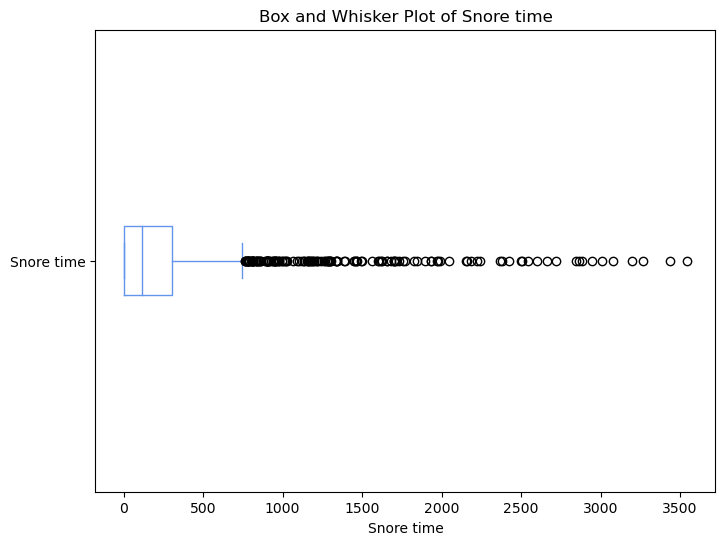

In [80]:
# Plot a box and whisker plot
plt.figure(figsize=(8, 6))
sleep_tracker_imputed['Snore time'].plot(kind='box', vert=False, color='cornflowerblue')
plt.title('Box and Whisker Plot of Snore time')
plt.xlabel('Snore time')
plt.show()

In [81]:
# Filter out the rows where Snore time is 0
snore_time_non_zero = sleep_tracker_imputed[sleep_tracker_imputed['Snore time'] != 0]

# Calculate the statistics
snore_min_non_zero = snore_time_non_zero['Snore time'].min()
snore_max_non_zero = snore_time_non_zero['Snore time'].max()
snore_median_non_zero = snore_time_non_zero['Snore time'].median()
snore_mean_non_zero = snore_time_non_zero['Snore time'].mean()

# Print the statistics
print(f"Min (without 0s): {snore_min_non_zero}")
print(f"Max (without 0s): {snore_max_non_zero}")
print(f"Median (without 0s): {snore_median_non_zero}")
print(f"Mean (without 0s): {snore_mean_non_zero}")

Min (without 0s): 1.0
Max (without 0s): 3544.8
Median (without 0s): 195.0
Mean (without 0s): 373.4583676834295


In [82]:
sleep_tracker_imputed.loc[(sleep_tracker_imputed['Did snore'] == 1) & (sleep_tracker_imputed['Snore time'] == 0), 'Snore time'] = snore_median_non_zero

In [83]:
# Check if any 0 values remain
zero_values_remaining = (sleep_tracker_imputed['Snore time'] == 0).sum()
print(f"Number of 0 values remaining in Snore time': {zero_values_remaining}")

Number of 0 values remaining in Snore time': 28


The median was used for imputation due to the large outliers affecting the mean. 28 instances of 0 remain which is inline with the 28 instances of did snore = false. 

## Duplicate Values

The target variable represents the mood for one given day. It is possible that there are several sleep recordings for a single day. This will be verified before moving forward.

To begin, the Start and End columns will be split into Start Date, Start Time and End Date, End Time for easier manipulation.

In [84]:
display(sleep_tracker_imputed.head())

,Start,End,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time
0,2020-04-25 00:07:13,2020-04-25 07:44:31,0.78,0.00,Normal,96.1,46.6,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,195.0
1,2020-04-26 01:24:33,2020-04-26 09:14:20,0.71,0.00,Normal,97.3,47.4,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0
2,2020-04-26 23:30:09,2020-04-27 06:55:40,0.64,0.65,Normal,97.4,56.9,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,195.0
3,2020-04-27 23:27:10,2020-04-28 06:13:03,0.79,0.79,Normal,96.9,42.2,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,195.0
4,2020-04-28 22:11:09,2020-04-29 06:38:02,0.75,0.81,Normal,96.3,57.2,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,195.0


In [85]:
sleep_tracker_expanded = sleep_tracker_imputed.copy()

In [86]:
# Create new columns for date and time
sleep_tracker_expanded['Start Date'] = sleep_tracker_expanded['Start'].dt.date
sleep_tracker_expanded['Start Time'] = sleep_tracker_expanded['Start'].dt.time
sleep_tracker_expanded['End Date'] = sleep_tracker_expanded['End'].dt.date
sleep_tracker_expanded['End Time'] = sleep_tracker_expanded['End'].dt.time

In [87]:
display(sleep_tracker_expanded.head())

,Start,End,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Start Date,Start Time,End Date,End Time
0,2020-04-25 00:07:13,2020-04-25 07:44:31,0.78,0.00,Normal,96.1,46.6,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,195.0,2020-04-25,00:07:13,2020-04-25,07:44:31
1,2020-04-26 01:24:33,2020-04-26 09:14:20,0.71,0.00,Normal,97.3,47.4,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0,2020-04-26,01:24:33,2020-04-26,09:14:20
2,2020-04-26 23:30:09,2020-04-27 06:55:40,0.64,0.65,Normal,97.4,56.9,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,195.0,2020-04-26,23:30:09,2020-04-27,06:55:40
3,2020-04-27 23:27:10,2020-04-28 06:13:03,0.79,0.79,Normal,96.9,42.2,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,195.0,2020-04-27,23:27:10,2020-04-28,06:13:03
4,2020-04-28 22:11:09,2020-04-29 06:38:02,0.75,0.81,Normal,96.3,57.2,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,195.0,2020-04-28,22:11:09,2020-04-29,06:38:02


In [88]:
# Drop the Start and End columns
sleep_tracker_expanded = sleep_tracker_expanded.drop(columns=['Start', 'End'])

In [89]:
# View the updated dataframe
display(sleep_tracker_expanded.head())

,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Start Date,Start Time,End Date,End Time
0,0.78,0.00,Normal,96.1,46.6,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,195.0,2020-04-25,00:07:13,2020-04-25,07:44:31
1,0.71,0.00,Normal,97.3,47.4,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0,2020-04-26,01:24:33,2020-04-26,09:14:20
2,0.64,0.65,Normal,97.4,56.9,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,195.0,2020-04-26,23:30:09,2020-04-27,06:55:40
3,0.79,0.79,Normal,96.9,42.2,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,195.0,2020-04-27,23:27:10,2020-04-28,06:13:03
4,0.75,0.81,Normal,96.3,57.2,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,195.0,2020-04-28,22:11:09,2020-04-29,06:38:02


In [90]:
# Check for duplicate dates 
duplicate_dates = sleep_tracker_expanded['End Date'].duplicated(keep=False)

# Filter and display rows where
duplicates_df = sleep_tracker_expanded[duplicate_dates]

# Print the duplicate dates
print(duplicates_df[['End Date']].value_counts())

End Date  
2020-06-11    2
2024-06-16    2
2024-05-31    2
2024-06-01    2
2024-06-02    2
             ..
2024-05-16    2
2024-05-20    2
2024-05-23    2
2024-05-25    2
2025-01-03    2
Name: count, Length: 62, dtype: int64


There are 62 instances where the end date is duplicated. This will prove problematic for merging the datasets.

In [91]:
duplicated_dates = sleep_tracker_expanded[sleep_tracker_expanded.duplicated(subset=['End Date'], keep=False)]
duplicated_dates = duplicated_dates.sort_values(by=['End Date'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(duplicated_dates)

,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Start Date,Start Time,End Date,End Time
47,0.09,0.70,Normal,97.3,245.7,7324.6,5420.2,146.5,2020-06-11 06:05:00,2020-06-11 06:35:00,True,195.0,2020-06-10,22:13:46,2020-06-11,00:15:51
48,0.57,0.89,Normal,97.5,87.0,21061.3,16287.4,3159.2,2020-06-11 06:10:00,2020-06-11 06:40:00,True,195.0,2020-06-11,00:26:28,2020-06-11,06:17:29
155,0.04,0.69,Normal,96.7,0.0,1164.9,1141.6,23.3,2020-09-26 06:20:00,2020-09-26 06:50:00,True,195.0,2020-09-25,23:47:12,2020-09-26,00:06:37
156,0.90,0.82,No alarm,96.7,43.2,28665.0,23505.3,5159.7,NaT,NaT,True,69.8,2020-09-26,00:07:02,2020-09-26,08:04:47
359,0.86,0.90,Normal,96.9,56.6,30193.5,26268.3,1409.0,2021-04-19 06:10:00,2021-04-19 06:40:00,True,178.0,2021-04-18,21:59:11,2021-04-19,06:22:24
360,0.19,0.49,Normal,96.6,0.0,5340.6,5233.8,106.8,2021-04-20 05:45:00,2021-04-20 06:15:00,False,0.0,2021-04-19,21:50:43,2021-04-19,23:19:44
471,0.80,0.78,Normal,96.7,71.8,27613.3,24852.0,552.3,2021-08-10 05:15:00,2021-08-10 05:45:00,True,1625.4,2021-08-09,22:03:04,2021-08-10,05:43:17
472,0.17,0.38,Normal,96.8,0.0,5700.4,4655.3,114.0,2021-08-11 06:20:00,2021-08-11 06:50:00,False,0.0,2021-08-10,21:38:51,2021-08-10,23:13:51
514,0.72,0.97,Normal,97.7,98.1,31016.2,23468.9,5893.1,2021-09-22 06:10:00,2021-09-22 06:40:00,True,190.1,2021-09-21,21:37:50,2021-09-22,06:14:46
515,0.10,0.48,Normal,97.4,0.0,2916.9,1594.6,58.3,2021-09-23 06:20:00,2021-09-23 06:50:00,True,195.0,2021-09-22,22:22:21,2021-09-22,23:10:58


The issue these duplicates are highlighting is that sometimes the participant went to bed, woke up and then went back to bed. This should all be counted towards the sleep statistics of the date the mood was tracked. Some are duplicate entries on the same day while others span the previous night to the following morning.

To fix this issue, the sleep statistics will be aggregated. If the start time of the sleep cycle occurred before 8:30 am, the entry will be aggregated with the start time of the previous night. A boolean field will also be added to account for nights where sleep was disrupted.

In [92]:
from datetime import timedelta, datetime

In [93]:
sleep_tracker_aggregated = sleep_tracker_expanded.copy()

In [94]:
# Convert '08:30:00' to a time object
time_threshold = datetime.strptime('08:30:00', '%H:%M:%S').time()

# Create 'Sleep Night' based on 'Start Time'
sleep_tracker_aggregated['Sleep Night'] = sleep_tracker_aggregated['Start Date']

# Adjust 'Sleep Night' based on 'Start Time' before the threshold
sleep_tracker_aggregated.loc[sleep_tracker_aggregated['Start Time'] < time_threshold, 'Sleep Night'] -= timedelta(days=1)

In [95]:
# Add 'Disrupted Sleep' boolean field
sleep_tracker_aggregated['Disrupted Sleep'] = sleep_tracker_aggregated['Start Time'].apply(lambda x: 1 if x >= pd.to_datetime('00:00:00').time() else 0)

In [96]:
# Shift 'Sleep Night' to align with the mood recording date
sleep_tracker_aggregated['Mood Date'] = sleep_tracker_aggregated['Sleep Night'] + timedelta(days=1)

In [97]:
display(sleep_tracker_aggregated.head())

,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Start Date,Start Time,End Date,End Time,Sleep Night,Disrupted Sleep,Mood Date
0,0.78,0.00,Normal,96.1,46.6,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,195.0,2020-04-25,00:07:13,2020-04-25,07:44:31,2020-04-24,1,2020-04-25
1,0.71,0.00,Normal,97.3,47.4,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0,2020-04-26,01:24:33,2020-04-26,09:14:20,2020-04-25,1,2020-04-26
2,0.64,0.65,Normal,97.4,56.9,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,195.0,2020-04-26,23:30:09,2020-04-27,06:55:40,2020-04-26,1,2020-04-27
3,0.79,0.79,Normal,96.9,42.2,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,195.0,2020-04-27,23:27:10,2020-04-28,06:13:03,2020-04-27,1,2020-04-28
4,0.75,0.81,Normal,96.3,57.2,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,195.0,2020-04-28,22:11:09,2020-04-29,06:38:02,2020-04-28,1,2020-04-29


In [98]:
# Count occurrences of each Sleep Night
sleep_night_counts = sleep_tracker_aggregated.groupby('Sleep Night').size()

# Identify disrupted sleep nights (those appearing more than once)
disrupted_sleep_nights = sleep_night_counts[sleep_night_counts > 1].index

# Assign Disrupted Sleep flag
sleep_tracker_aggregated['Disrupted Sleep'] = sleep_tracker_aggregated['Sleep Night'].isin(disrupted_sleep_nights)

In [99]:
display(sleep_tracker_aggregated.head())

,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Start Date,Start Time,End Date,End Time,Sleep Night,Disrupted Sleep,Mood Date
0,0.78,0.00,Normal,96.1,46.6,27438.9,23323.1,548.8,2020-04-25 09:50:00,2020-04-25 10:20:00,True,195.0,2020-04-25,00:07:13,2020-04-25,07:44:31,2020-04-24,False,2020-04-25
1,0.71,0.00,Normal,97.3,47.4,28187.0,23771.0,1879.1,2020-04-26 10:10:00,2020-04-26 10:40:00,True,644.0,2020-04-26,01:24:33,2020-04-26,09:14:20,2020-04-25,False,2020-04-26
2,0.64,0.65,Normal,97.4,56.9,26730.9,21563.0,2673.1,2020-04-27 06:30:00,2020-04-27 07:00:00,True,195.0,2020-04-26,23:30:09,2020-04-27,06:55:40,2020-04-26,False,2020-04-27
3,0.79,0.79,Normal,96.9,42.2,24353.2,20131.9,4221.2,2020-04-28 06:00:00,2020-04-28 06:30:00,True,195.0,2020-04-27,23:27:10,2020-04-28,06:13:03,2020-04-27,False,2020-04-28
4,0.75,0.81,Normal,96.3,57.2,30412.3,24228.5,1824.7,2020-04-29 06:10:00,2020-04-29 06:40:00,True,195.0,2020-04-28,22:11:09,2020-04-29,06:38:02,2020-04-28,False,2020-04-29


In [100]:
duplicated_mood_dates = sleep_tracker_aggregated[sleep_tracker_aggregated.duplicated(subset=['Mood Date'], keep=False)]
duplicated_mood_dates = duplicated_mood_dates.sort_values(by=['Mood Date'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(duplicated_dates)

,Sleep Quality,Regularity,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Start Date,Start Time,End Date,End Time
47,0.09,0.70,Normal,97.3,245.7,7324.6,5420.2,146.5,2020-06-11 06:05:00,2020-06-11 06:35:00,True,195.0,2020-06-10,22:13:46,2020-06-11,00:15:51
48,0.57,0.89,Normal,97.5,87.0,21061.3,16287.4,3159.2,2020-06-11 06:10:00,2020-06-11 06:40:00,True,195.0,2020-06-11,00:26:28,2020-06-11,06:17:29
155,0.04,0.69,Normal,96.7,0.0,1164.9,1141.6,23.3,2020-09-26 06:20:00,2020-09-26 06:50:00,True,195.0,2020-09-25,23:47:12,2020-09-26,00:06:37
156,0.90,0.82,No alarm,96.7,43.2,28665.0,23505.3,5159.7,NaT,NaT,True,69.8,2020-09-26,00:07:02,2020-09-26,08:04:47
359,0.86,0.90,Normal,96.9,56.6,30193.5,26268.3,1409.0,2021-04-19 06:10:00,2021-04-19 06:40:00,True,178.0,2021-04-18,21:59:11,2021-04-19,06:22:24
360,0.19,0.49,Normal,96.6,0.0,5340.6,5233.8,106.8,2021-04-20 05:45:00,2021-04-20 06:15:00,False,0.0,2021-04-19,21:50:43,2021-04-19,23:19:44
471,0.80,0.78,Normal,96.7,71.8,27613.3,24852.0,552.3,2021-08-10 05:15:00,2021-08-10 05:45:00,True,1625.4,2021-08-09,22:03:04,2021-08-10,05:43:17
472,0.17,0.38,Normal,96.8,0.0,5700.4,4655.3,114.0,2021-08-11 06:20:00,2021-08-11 06:50:00,False,0.0,2021-08-10,21:38:51,2021-08-10,23:13:51
514,0.72,0.97,Normal,97.7,98.1,31016.2,23468.9,5893.1,2021-09-22 06:10:00,2021-09-22 06:40:00,True,190.1,2021-09-21,21:37:50,2021-09-22,06:14:46
515,0.10,0.48,Normal,97.4,0.0,2916.9,1594.6,58.3,2021-09-23 06:20:00,2021-09-23 06:50:00,True,195.0,2021-09-22,22:22:21,2021-09-22,23:10:58


In [101]:
# Calculate weighted columns before aggregation
sleep_tracker_aggregated['Weighted Movements'] = sleep_tracker_aggregated['Movements per hour'] * sleep_tracker_aggregated['Time asleep (seconds)']
sleep_tracker_aggregated['Weighted Sleep Quality'] = sleep_tracker_aggregated['Sleep Quality'] * sleep_tracker_aggregated['Time asleep (seconds)']
sleep_tracker_aggregated['Weighted Regularity'] = sleep_tracker_aggregated['Regularity'] * sleep_tracker_aggregated['Time asleep (seconds)']

In [102]:
# Aggregate data
aggregated_sleep = sleep_tracker_aggregated.groupby('Mood Date').agg({
    'Time asleep (seconds)': 'sum',
    'Time in bed (seconds)': 'sum',
    'Time before sleep (seconds)': 'median',
    'Snore time': 'sum',
    'Weighted Movements': 'sum',  # Sum weighted movements
    'Weighted Sleep Quality': 'sum',  # Sum weighted sleep quality
    'Weighted Regularity': 'sum',  # Sum weighted regularity
    'Disrupted Sleep': 'max',  # Max to check if disrupted sleep occurred
    'Alarm mode': lambda x: 'Normal' if len(set(x)) > 1 else x.iloc[0],  # Set to Normal if different values exist
}).reset_index()

In [103]:
# Compute final weighted averages
aggregated_sleep['Movements per hour'] = aggregated_sleep['Weighted Movements'] / aggregated_sleep['Time asleep (seconds)']
aggregated_sleep['Sleep Quality'] = aggregated_sleep['Weighted Sleep Quality'] / aggregated_sleep['Time asleep (seconds)']
aggregated_sleep['Regularity'] = aggregated_sleep['Weighted Regularity'] / aggregated_sleep['Time asleep (seconds)']

In [104]:
display(aggregated_sleep.head())

,Mood Date,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Weighted Movements,Weighted Sleep Quality,Weighted Regularity,Disrupted Sleep,Alarm mode,Movements per hour,Sleep Quality,Regularity
0,2020-04-25,23323.1,27438.9,548.8,195.0,1086856.46,18192.018,0.000,False,Normal,46.6,0.78,0.00
1,2020-04-26,23771.0,28187.0,1879.1,644.0,1126745.40,16877.410,0.000,False,Normal,47.4,0.71,0.00
2,2020-04-27,21563.0,26730.9,2673.1,195.0,1226934.70,13800.320,14015.950,False,Normal,56.9,0.64,0.65
3,2020-04-28,20131.9,24353.2,4221.2,195.0,849566.18,15904.201,15904.201,False,Normal,42.2,0.79,0.79
4,2020-04-29,24228.5,30412.3,1824.7,195.0,1385870.20,18171.375,19625.085,False,Normal,57.2,0.75,0.81


In [105]:
# Drop intermediate weighted columns
aggregated_sleep.drop(columns=['Weighted Movements', 'Weighted Sleep Quality', 'Weighted Regularity'], inplace=True)

In [106]:
display(aggregated_sleep.head())
print(len(aggregated_sleep))

,Mood Date,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Alarm mode,Movements per hour,Sleep Quality,Regularity
0,2020-04-25,23323.1,27438.9,548.8,195.0,False,Normal,46.6,0.78,0.00
1,2020-04-26,23771.0,28187.0,1879.1,644.0,False,Normal,47.4,0.71,0.00
2,2020-04-27,21563.0,26730.9,2673.1,195.0,False,Normal,56.9,0.64,0.65
3,2020-04-28,20131.9,24353.2,4221.2,195.0,False,Normal,42.2,0.79,0.79
4,2020-04-29,24228.5,30412.3,1824.7,195.0,False,Normal,57.2,0.75,0.81


1657


Weighted averages were used for features that depend on other variables in the dataframe. For example, movements per hour is a calculation of movements based on the time in bed. Summation was used where possible and if an alarm was present at the first bed time, but not the second, alarm mode was marked as normal.

Multiple features such as start and stop alarm window times as well as sleep start dates and start and end times have been dropped during this transformation. Did snore was also dropped as it is already represented by snore time.

In [107]:
duplicated_mood_dates = aggregated_sleep['Mood Date'].value_counts()
print(duplicated_mood_dates[duplicated_mood_dates > 1])

Series([], Name: count, dtype: int64)


# Merging the Datasets

Now that both datasets have been cleaned, they can be merged. The mood tracker app was used before the sleep app so a left-join on the sleep tracker will be performed. The datasets will be merged on the full_date column from the mood tracker app and the Mood Date from the sleep tracker app.

In [108]:
display(mood_tracker_encoded.head(2))
display(aggregated_sleep.head(2))

,full_date,weekday,mood,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,activity Racing Thoughts,activity SMART,activity Sports,activity Stocks,activity Writing,activity bad sleep,activity car trouble,activity cleaning,activity date,activity drinking,activity errands,activity family,activity friends,activity gaming,activity good meal,activity house stuff,activity movies,activity nap,activity negative self talk,activity no megan,activity party,activity phone rabbit hole,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,year,weekday_encoded
0,2025-02-04,Tuesday,good,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,4,2025,1.0
1,2025-02-03,Monday,bad,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2025,0.0


,Mood Date,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Alarm mode,Movements per hour,Sleep Quality,Regularity
0,2020-04-25,23323.1,27438.9,548.8,195.0,False,Normal,46.6,0.78,0.0
1,2020-04-26,23771.0,28187.0,1879.1,644.0,False,Normal,47.4,0.71,0.0


In [109]:
# Convert 'Mood Date' and 'full_date' to datetime format
aggregated_sleep['Mood Date'] = pd.to_datetime(aggregated_sleep['Mood Date'])
mood_tracker_encoded['full_date'] = pd.to_datetime(mood_tracker_encoded['full_date'])

In [110]:
merged_df = aggregated_sleep.merge(
    mood_tracker_encoded, 
    left_on='Mood Date', 
    right_on='full_date', 
    how='left'
)

In [111]:
display(merged_df.head(5))

,Mood Date,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Alarm mode,Movements per hour,Sleep Quality,Regularity,full_date,weekday,mood,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,activity Racing Thoughts,activity SMART,activity Sports,activity Stocks,activity Writing,activity bad sleep,activity car trouble,activity cleaning,activity date,activity drinking,activity errands,activity family,activity friends,activity gaming,activity good meal,activity house stuff,activity movies,activity nap,activity negative self talk,activity no megan,activity party,activity phone rabbit hole,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,year,weekday_encoded
0,2020-04-25,23323.1,27438.9,548.8,195.0,False,Normal,46.6,0.78,0.00,2020-04-25,Saturday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,5.0
1,2020-04-26,23771.0,28187.0,1879.1,644.0,False,Normal,47.4,0.71,0.00,2020-04-26,Sunday,good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2020.0,6.0
2,2020-04-27,21563.0,26730.9,2673.1,195.0,False,Normal,56.9,0.64,0.65,2020-04-27,Monday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,0.0
3,2020-04-28,20131.9,24353.2,4221.2,195.0,False,Normal,42.2,0.79,0.79,2020-04-28,Tuesday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,1.0
4,2020-04-29,24228.5,30412.3,1824.7,195.0,False,Normal,57.2,0.75,0.81,2020-04-29,Wednesday,good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2020.0,2.0


## Visualizations

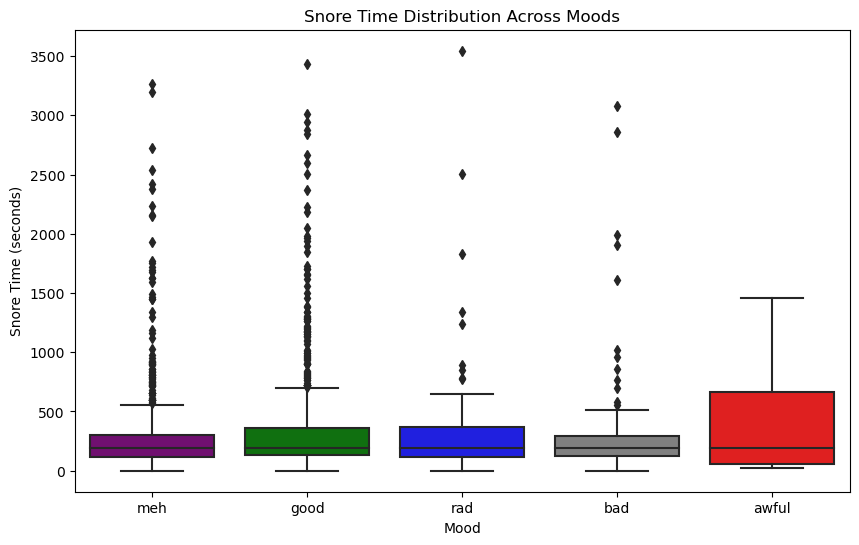

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='mood', y='Snore time', palette=mood_colors)
plt.xlabel('Mood')
plt.ylabel('Snore Time (seconds)')
plt.title('Snore Time Distribution Across Moods')

plt.show()

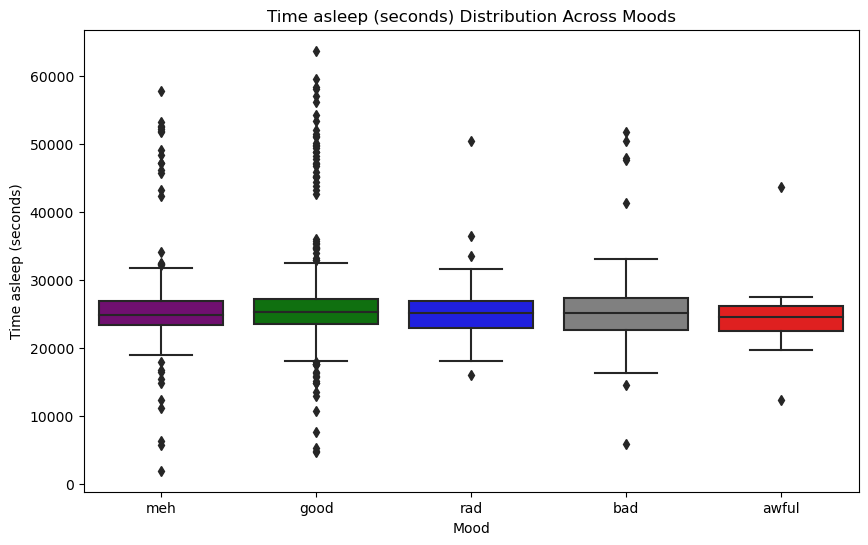

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='mood', y='Time asleep (seconds)', palette=mood_colors)
plt.xlabel('Mood')
plt.ylabel('Time asleep (seconds)')
plt.title('Time asleep (seconds) Distribution Across Moods')

# Save the figure to the local directory 
plt.savefig("mood_time_asleep_box_whisker.png", dpi=300, bbox_inches="tight")

plt.show()

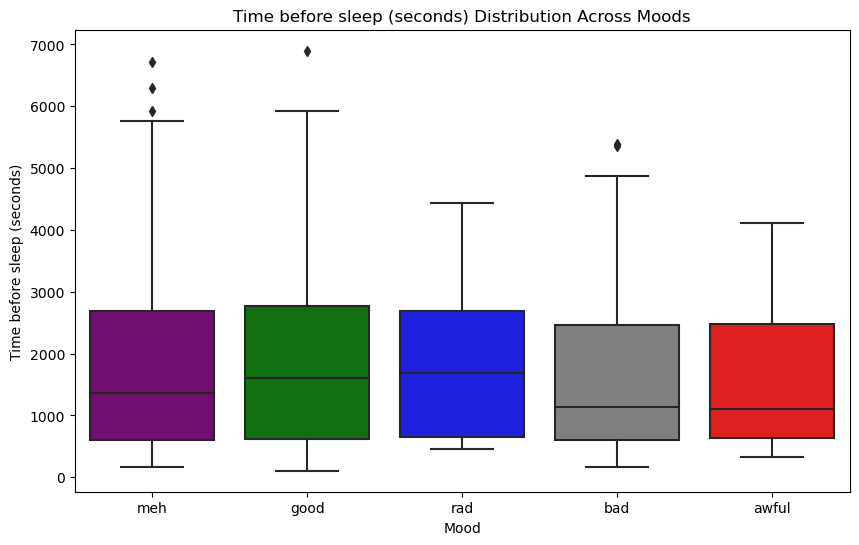

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='mood', y='Time before sleep (seconds)', palette=mood_colors)
plt.xlabel('Mood')
plt.ylabel('Time before sleep (seconds)')
plt.title('Time before sleep (seconds) Distribution Across Moods')

plt.show()

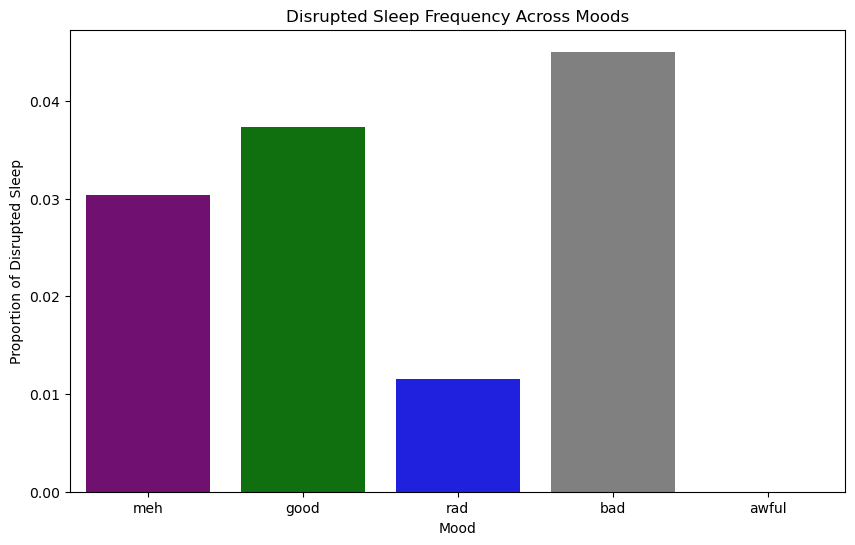

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='mood', y='Disrupted Sleep', palette=mood_colors, ci=None)
plt.xlabel('Mood')
plt.ylabel('Proportion of Disrupted Sleep')
plt.title('Disrupted Sleep Frequency Across Moods')

plt.show()

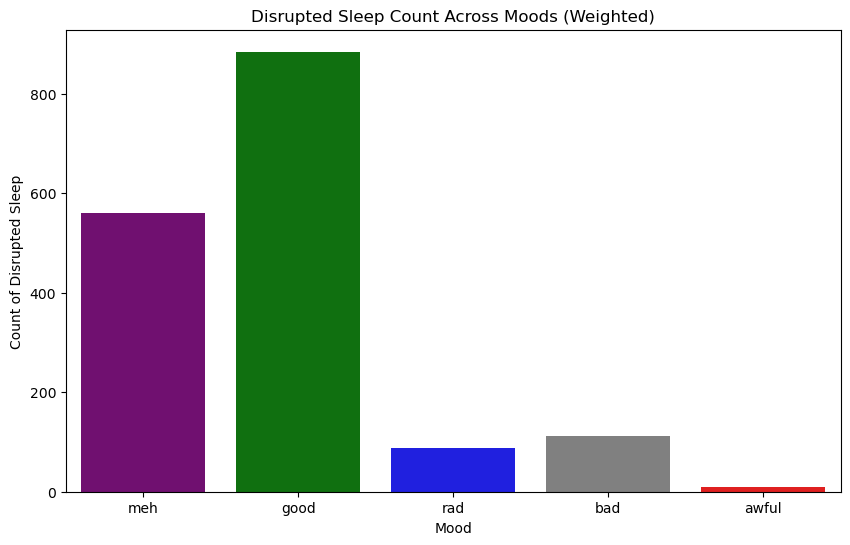

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='mood', y='Disrupted Sleep', estimator=lambda x: len(x), ci=None, palette=mood_colors)
plt.xlabel('Mood')
plt.ylabel('Count of Disrupted Sleep')
plt.title('Disrupted Sleep Count Across Moods (Weighted)')

plt.show()

It is difficult to see any possible correlations between moods and the sleep tracker data from these visualizations.

### Encoding

Most of the features have already been encoded but in order to better perform correlation testing, the alarm column still needs to be converted.

In [117]:
encoded_merged = merged_df.copy()

In [118]:
display(encoded_merged.head())

rows, columns = encoded_merged.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

,Mood Date,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Alarm mode,Movements per hour,Sleep Quality,Regularity,full_date,weekday,mood,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,activity Racing Thoughts,activity SMART,activity Sports,activity Stocks,activity Writing,activity bad sleep,activity car trouble,activity cleaning,activity date,activity drinking,activity errands,activity family,activity friends,activity gaming,activity good meal,activity house stuff,activity movies,activity nap,activity negative self talk,activity no megan,activity party,activity phone rabbit hole,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,year,weekday_encoded
0,2020-04-25,23323.1,27438.9,548.8,195.0,False,Normal,46.6,0.78,0.00,2020-04-25,Saturday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,5.0
1,2020-04-26,23771.0,28187.0,1879.1,644.0,False,Normal,47.4,0.71,0.00,2020-04-26,Sunday,good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2020.0,6.0
2,2020-04-27,21563.0,26730.9,2673.1,195.0,False,Normal,56.9,0.64,0.65,2020-04-27,Monday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,0.0
3,2020-04-28,20131.9,24353.2,4221.2,195.0,False,Normal,42.2,0.79,0.79,2020-04-28,Tuesday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,1.0
4,2020-04-29,24228.5,30412.3,1824.7,195.0,False,Normal,57.2,0.75,0.81,2020-04-29,Wednesday,good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2020.0,2.0


Number of rows: 1657
Number of columns: 55


In [119]:
# Convert 'Alarm mode' to a boolean column 'Alarm'
encoded_merged['Alarm'] = encoded_merged['Alarm mode'].replace({'Normal': True, 'No alarm': False})

In [120]:
print(encoded_merged[['Alarm mode', 'Alarm']].head())

encoded_merged = encoded_merged.drop(columns=['Alarm mode', 'full_date'])

  Alarm mode  Alarm
0     Normal   True
1     Normal   True
2     Normal   True
3     Normal   True
4     Normal   True


In [121]:
display(encoded_merged.head(2))

,Mood Date,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Movements per hour,Sleep Quality,Regularity,weekday,mood,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,activity Racing Thoughts,activity SMART,activity Sports,activity Stocks,activity Writing,activity bad sleep,activity car trouble,activity cleaning,activity date,activity drinking,activity errands,activity family,activity friends,activity gaming,activity good meal,activity house stuff,activity movies,activity nap,activity negative self talk,activity no megan,activity party,activity phone rabbit hole,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,year,weekday_encoded,Alarm
0,2020-04-25,23323.1,27438.9,548.8,195.0,False,46.6,0.78,0.0,Saturday,meh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2020.0,5.0,True
1,2020-04-26,23771.0,28187.0,1879.1,644.0,False,47.4,0.71,0.0,Sunday,good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2020.0,6.0,True


In [122]:
print(encoded_merged.dtypes)

Mood Date                      datetime64[ns]
Time asleep (seconds)                 float64
Time in bed (seconds)                 float64
Time before sleep (seconds)           float64
Snore time                            float64
Disrupted Sleep                          bool
Movements per hour                    float64
Sleep Quality                         float64
Regularity                            float64
weekday                              category
mood                                   object
activity Don’t feel good              float64
activity Gym                          float64
activity Hike                         float64
activity Language                     float64
activity Megan                        float64
activity Phone call                   float64
activity Pool/Water                   float64
activity Racing Thoughts              float64
activity SMART                        float64
activity Sports                       float64
activity Stocks                   

### Missing Values

Now that the datasets are merged, missing values need to be checked again. Because the merge was a left join performed on the sleep tracker data, only mood data that matched sleep tracker dates pulled in.

In [123]:
na_values = encoded_merged.isna().sum()
na_values = na_values[na_values > 0]
print(na_values)

weekday                        6
mood                           6
activity Don’t feel good       6
activity Gym                   6
activity Hike                  6
activity Language              6
activity Megan                 6
activity Phone call            6
activity Pool/Water            6
activity Racing Thoughts       6
activity SMART                 6
activity Sports                6
activity Stocks                6
activity Writing               6
activity bad sleep             6
activity car trouble           6
activity cleaning              6
activity date                  6
activity drinking              6
activity errands               6
activity family                6
activity friends               6
activity gaming                6
activity good meal             6
activity house stuff           6
activity movies                6
activity nap                   6
activity negative self talk    6
activity no megan              6
activity party                 6
activity p

There appear to be 6 dates for which mood data is not available. Due to the small number and because imputing activities and mood would be difficult, the 6 will be dropped from the dataframe.

In [124]:
encoded_dropped = encoded_merged.copy()

In [125]:
display(encoded_dropped.columns)

rows, columns = encoded_dropped.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Index(['Mood Date', 'Time asleep (seconds)', 'Time in bed (seconds)',
       'Time before sleep (seconds)', 'Snore time', 'Disrupted Sleep',
       'Movements per hour', 'Sleep Quality', 'Regularity', 'weekday', 'mood',
       'activity Don’t feel good', 'activity Gym', 'activity Hike',
       'activity Language', 'activity Megan', 'activity Phone call',
       'activity Pool/Water', 'activity Racing Thoughts', 'activity SMART',
       'activity Sports', 'activity Stocks', 'activity Writing',
       'activity bad sleep', 'activity car trouble', 'activity cleaning',
       'activity date', 'activity drinking', 'activity errands',
       'activity family', 'activity friends', 'activity gaming',
       'activity good meal', 'activity house stuff', 'activity movies',
       'activity nap', 'activity negative self talk', 'activity no megan',
       'activity party', 'activity phone rabbit hole', 'activity reading',
       'activity really good sleep', 'activity relax', 'activity shopping',


Number of rows: 1657
Number of columns: 54


In [126]:
encoded_dropped = encoded_dropped.dropna()

In [127]:
encoded_dropped = encoded_dropped.drop(columns=["year"], errors="ignore")

In [128]:
rows, columns = encoded_dropped.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 1651
Number of columns: 53


The rows have been dropped successfully. The year column was also dropped as it is no longer needed.

To prepare for modeling, the columns currently object columns will also be dropped.

In [129]:
print(encoded_dropped.dtypes)

Mood Date                      datetime64[ns]
Time asleep (seconds)                 float64
Time in bed (seconds)                 float64
Time before sleep (seconds)           float64
Snore time                            float64
Disrupted Sleep                          bool
Movements per hour                    float64
Sleep Quality                         float64
Regularity                            float64
weekday                              category
mood                                   object
activity Don’t feel good              float64
activity Gym                          float64
activity Hike                         float64
activity Language                     float64
activity Megan                        float64
activity Phone call                   float64
activity Pool/Water                   float64
activity Racing Thoughts              float64
activity SMART                        float64
activity Sports                       float64
activity Stocks                   

In [130]:
# Keep only numeric (int, float) and boolean columns
encoded_dropped = encoded_dropped.select_dtypes(include=['number', 'bool'])

# Verify remaining columns
print(encoded_dropped.dtypes)

Time asleep (seconds)          float64
Time in bed (seconds)          float64
Time before sleep (seconds)    float64
Snore time                     float64
Disrupted Sleep                   bool
Movements per hour             float64
Sleep Quality                  float64
Regularity                     float64
activity Don’t feel good       float64
activity Gym                   float64
activity Hike                  float64
activity Language              float64
activity Megan                 float64
activity Phone call            float64
activity Pool/Water            float64
activity Racing Thoughts       float64
activity SMART                 float64
activity Sports                float64
activity Stocks                float64
activity Writing               float64
activity bad sleep             float64
activity car trouble           float64
activity cleaning              float64
activity date                  float64
activity drinking              float64
activity errands         

# Preparing for Modeling

### Correlation

In [131]:
correlation_matrix = encoded_dropped.corr()
print(correlation_matrix)

                             Time asleep (seconds)  Time in bed (seconds)  \
Time asleep (seconds)                     1.000000               0.933468   
Time in bed (seconds)                     0.933468               1.000000   
Time before sleep (seconds)              -0.008204               0.120226   
Snore time                                0.004318               0.027636   
Disrupted Sleep                           0.743015               0.795012   
Movements per hour                       -0.071429              -0.052347   
Sleep Quality                             0.274593               0.322867   
Regularity                                0.033434               0.081703   
activity Don’t feel good                  0.039491               0.035822   
activity Gym                              0.016138              -0.006489   
activity Hike                            -0.014708              -0.006753   
activity Language                        -0.011727              -0.002832   

In [132]:
# Compute correlation matrix
corr_matrix = encoded_dropped.corr()

# Stack to convert into a long-form DataFrame
stacked_corr = corr_matrix.stack().reset_index()

# Rename columns for clarity
stacked_corr.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Sort by correlation values
stacked_corr = stacked_corr.sort_values(by='Correlation', ascending=False)

# Remove self-correlations (where Feature_1 == Feature_2)
stacked_corr = stacked_corr[stacked_corr['Feature_1'] != stacked_corr['Feature_2']]

In [133]:
display(stacked_corr)

,Feature_1,Feature_2,Correlation
1,Time asleep (seconds),Time in bed (seconds),0.933468
49,Time in bed (seconds),Time asleep (seconds),0.933468
2396,Alarm,activity work,0.807114
2204,activity work,Alarm,0.807114
53,Time in bed (seconds),Disrupted Sleep,0.795012
197,Disrupted Sleep,Time in bed (seconds),0.795012
4,Time asleep (seconds),Disrupted Sleep,0.743015
196,Disrupted Sleep,Time asleep (seconds),0.743015
831,activity SMART,weekday_encoded,0.401117
2319,weekday_encoded,activity SMART,0.401117


Time asleep and Time in bed are highly correlated with one another. One can be removed to avoid multicollinearity.

In [134]:
# Correlation with target variable (mood_numeric)
target_corr = encoded_dropped.corr()['mood_numeric'].abs().sort_values(ascending=False)

print(target_corr)

mood_numeric                   1.000000
activity relax                 0.273827
Alarm                          0.251450
weekday_encoded                0.215869
activity work                  0.204496
activity Gym                   0.204050
activity Racing Thoughts       0.196692
activity reading               0.183852
activity bad sleep             0.172165
activity SMART                 0.168330
activity negative self talk    0.150371
activity Megan                 0.136550
activity good meal             0.120349
activity travel                0.114315
activity Hike                  0.113957
activity shopping              0.110002
activity friends               0.102366
activity date                  0.100159
activity Don’t feel good       0.099997
Sleep Quality                  0.098883
activity Pool/Water            0.082183
activity something fun         0.070569
Regularity                     0.066748
activity really good sleep     0.065520
Movements per hour             0.059003


There are no strong correlation coefficients between any of the features and the target variable. 

The issues with skewness and kurtosis in the sleep-related data may be affecting those correlation coefficients.

Activities may need to be grouped into categories for better results.

### Skew & Kurtosis Revisited

In [135]:
# Select only numerical columns
numerical_cols = encoded_dropped.select_dtypes(include=['float64'])

In [136]:
# Compute statistics
skewness = numerical_cols.skew()
kurtosis = numerical_cols.kurtosis()

# Combine into a DataFrame
stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
display(stats_df)

,Skewness,Kurtosis
Time asleep (seconds),2.545248,12.818225
Time in bed (seconds),3.155847,16.737063
Time before sleep (seconds),0.762160,-0.265610
Snore time,3.608191,16.139859
Movements per hour,10.836084,120.608082
Sleep Quality,-1.860448,6.985165
Regularity,-5.071903,38.455026
activity Don’t feel good,7.221259,50.207395
activity Gym,0.929002,-1.138336
activity Hike,8.704573,73.859053


Feature	Suggested Fix
Sleep Quality (Skew -2.26)	Box-Cox
Regularity (Skew -4.94)	Box-Cox
Air Pressure (Skew -4.53)	Box-Cox
Movements per hour (Skew 11.04)	Log or Square Root
Time in bed (Skew -2.79)	Log
Time asleep (Skew -1.88)	Log
Time before sleep (Skew 0.73)	Likely fine
Snore time (Skew 3.38)	Log or Winsorize

The log will be used to normalize the following:

* Movements per hour

* Time in bed

* Time asleep

* Snore time

In [137]:
transformed_df = encoded_dropped.copy()

In [138]:
# List of columns to transform
columns_to_transform = ["Movements per hour", "Time in bed (seconds)", "Time asleep (seconds)", "Snore time"]

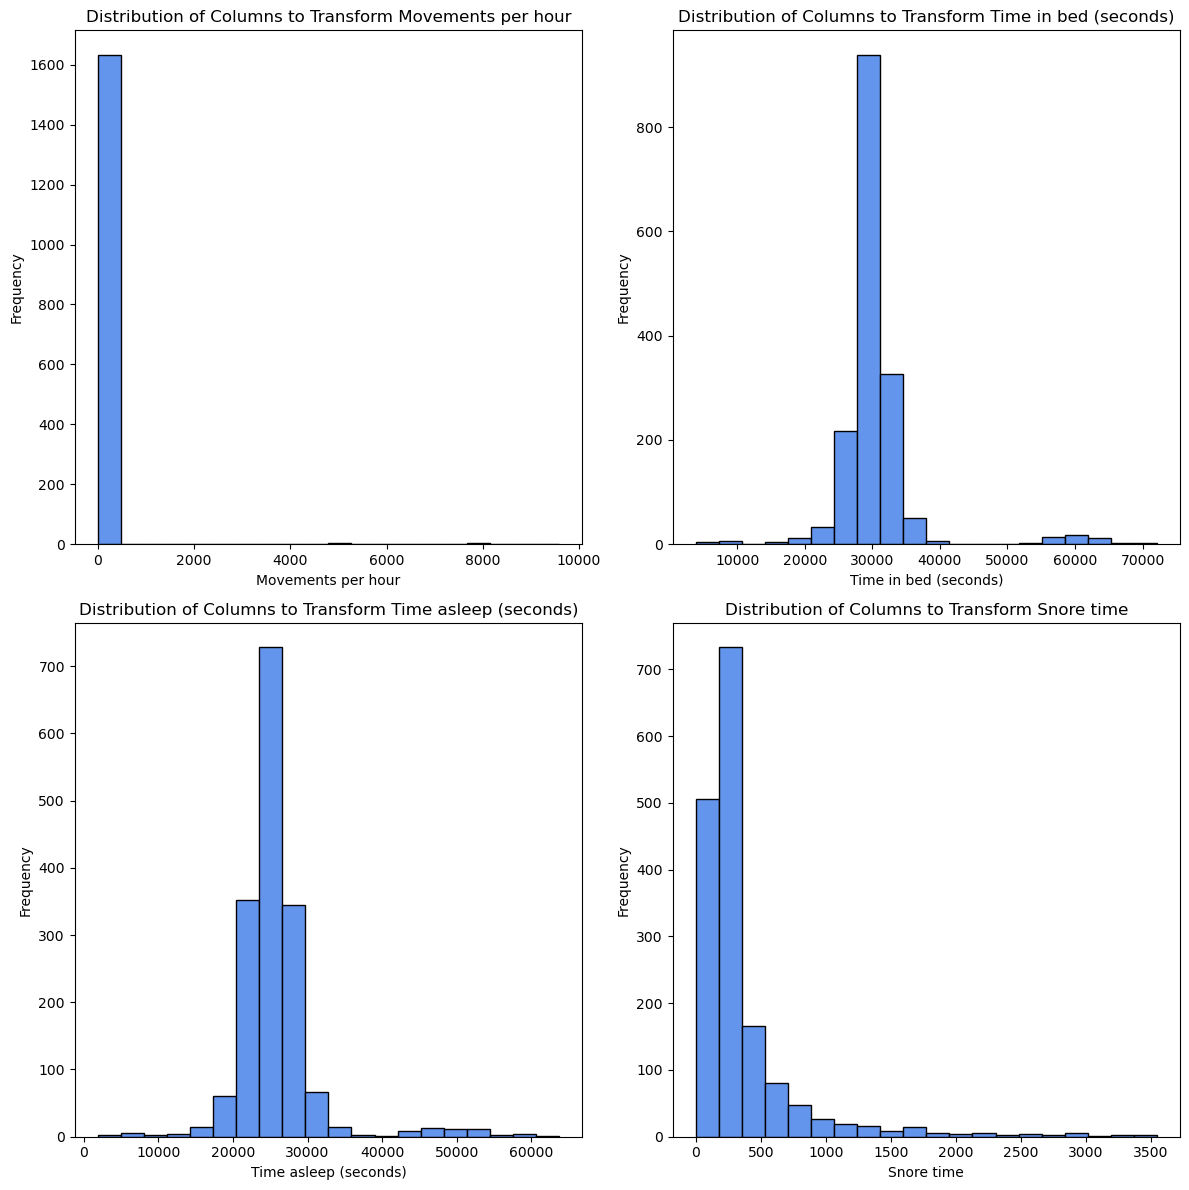

In [139]:
# Number of rows needed for the subplots
num_rows = (len(columns_to_transform) + 1) // 2  

# Create subplots with two columns and a taller aspect ratio
plt.figure(figsize=(12, 12))  

# Loop through each log-transformed column and plot the distribution
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(num_rows, 2, i)  
    transformed_df[column].hist(bins=20, color="cornflowerblue", edgecolor="black")
    plt.title(f"Distribution of Columns to Transform {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)  

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("columns_to_transform.png", dpi=300, bbox_inches="tight")

# Show plots
plt.show()

In [140]:
# Apply log transformation
transformed_df["Movements per hour log"] = np.log1p(transformed_df["Movements per hour"])
transformed_df["Time in bed (seconds) log"] = np.log1p(transformed_df["Time in bed (seconds)"])
transformed_df["Time asleep (seconds) log"] = np.log1p(transformed_df["Time asleep (seconds)"])
transformed_df["Snore time log"] = np.log1p(transformed_df["Snore time"])

In [141]:
display(transformed_df.head(2))

,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Movements per hour,Sleep Quality,Regularity,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,activity Racing Thoughts,activity SMART,activity Sports,activity Stocks,activity Writing,activity bad sleep,activity car trouble,activity cleaning,activity date,activity drinking,activity errands,activity family,activity friends,activity gaming,activity good meal,activity house stuff,activity movies,activity nap,activity negative self talk,activity no megan,activity party,activity phone rabbit hole,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,weekday_encoded,Alarm,Movements per hour log,Time in bed (seconds) log,Time asleep (seconds) log,Snore time log
0,23323.1,27438.9,548.8,195.0,False,46.6,0.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,True,3.862833,10.219753,10.057242,5.278115
1,23771.0,28187.0,1879.1,644.0,False,47.4,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,True,3.879500,10.246652,10.076264,6.469250


In [142]:
# List of log-transformed columns
log_transformed_columns = ["Movements per hour log", "Time in bed (seconds) log", "Time asleep (seconds) log", "Snore time log"]

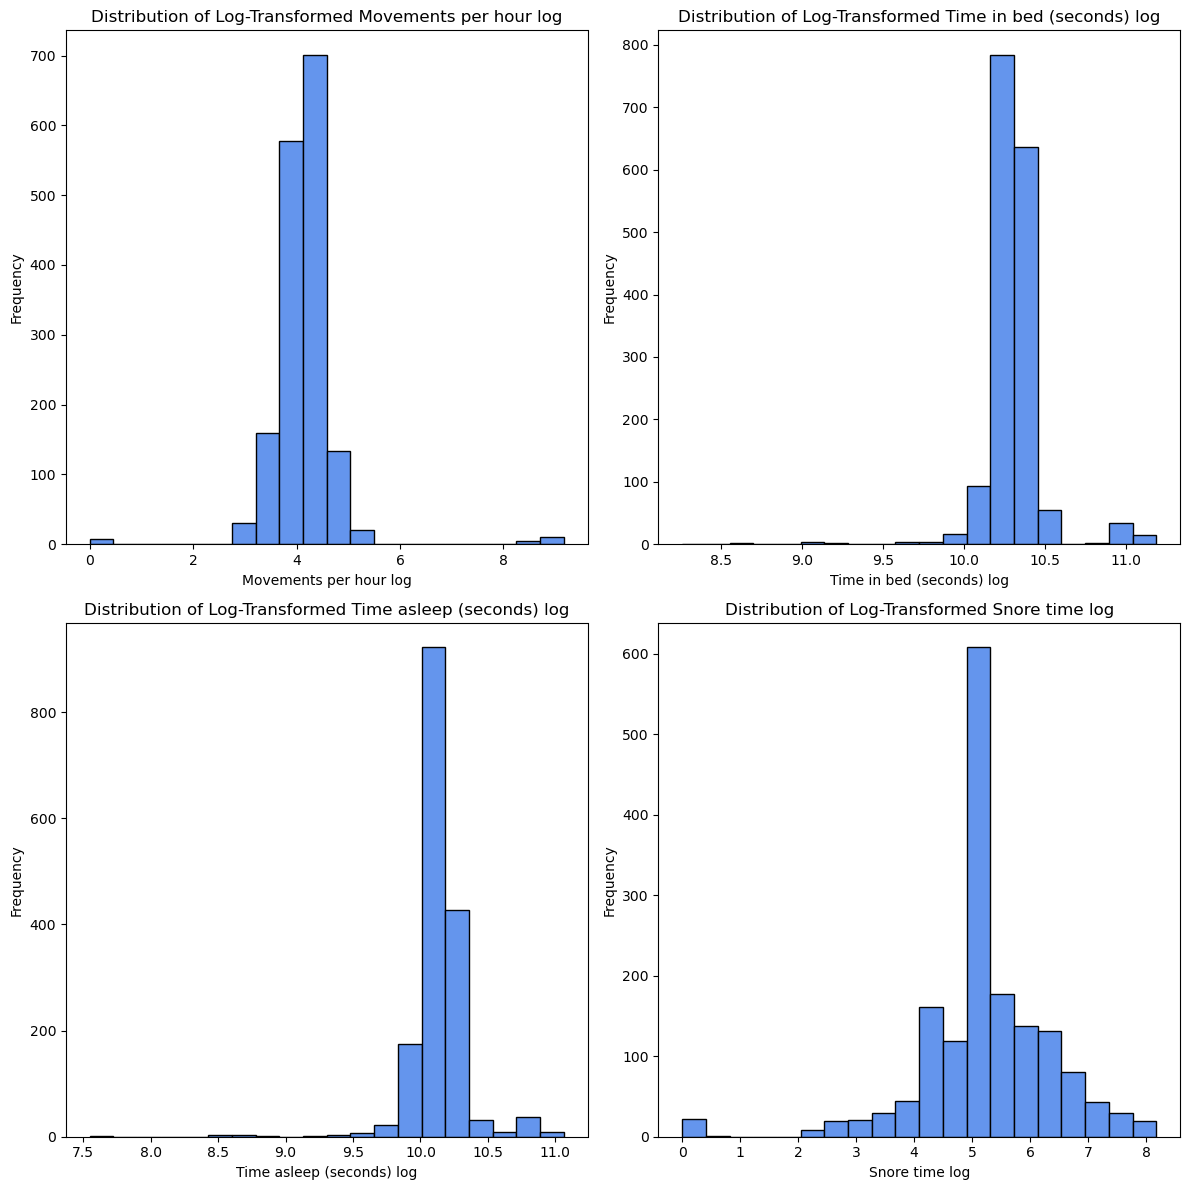

In [143]:
# Number of rows needed for the subplots
num_rows = (len(log_transformed_columns) + 1) // 2  

# Create subplots with two columns and a taller aspect ratio
plt.figure(figsize=(12, 12))  

# Loop through each log-transformed column and plot the distribution
for i, column in enumerate(log_transformed_columns, 1):
    plt.subplot(num_rows, 2, i)  
    transformed_df[column].hist(bins=20, color="cornflowerblue", edgecolor="black")
    plt.title(f"Distribution of Log-Transformed {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)  

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("log_transformed_distributions.png", dpi=300, bbox_inches="tight")

# Show plots
plt.show()

In [144]:
# Compute statistics on the log-transformed columns
skewness = transformed_df[log_transformed_columns].skew()
kurtosis = transformed_df[log_transformed_columns].kurtosis()

# Combine into a DataFrame
stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Display the result
display(stats_df)

,Skewness,Kurtosis
Movements per hour log,2.215329,27.310990
Time in bed (seconds) log,-1.479048,26.686801
Time asleep (seconds) log,-1.903090,27.490628
Snore time log,-1.245209,5.045068


While the log transformation helped the skewness, kurtosis remains high. Winsorization will be used at 5% as extreme outliers are the cause of the high kurtosis.

In [145]:
from scipy.stats.mstats import winsorize

In [146]:
# Create a copy of the DataFrame to store Winsorized values
winsorized_df = transformed_df.copy()

In [147]:
# Define columns to Winsorize
columns_to_winsorize = ['Movements per hour', 'Time in bed (seconds)', 'Time asleep (seconds)', 'Snore time']

In [148]:
# Apply Winsorization at the 1st and 99th percentiles
for col in columns_to_winsorize:
    transformed_df[f"{col} (Winsorized)"] = winsorize(transformed_df[col], limits=[0.05, 0.05])

In [149]:
# Display summary statistics for comparison
transformed_df[[col + " (Winsorized)" for col in columns_to_winsorize]].describe()

,Movements per hour (Winsorized),Time in bed (seconds) (Winsorized),Time asleep (seconds) (Winsorized),Snore time (Winsorized)
count,1651.000000,1651.000000,1651.000000,1651.000000
mean,64.772699,29930.317081,25321.842883,294.720836
std,22.529316,2565.126028,2886.307603,282.759401
min,30.200000,24957.400000,20131.900000,30.600000
25%,47.200000,28594.500000,23406.050000,124.050000
50%,62.600000,29710.900000,25075.000000,195.000000
75%,78.400000,31280.100000,27077.000000,346.700000
max,113.600000,35865.600000,31738.000000,1158.800000


In [150]:
display(transformed_df.head(2))

,Time asleep (seconds),Time in bed (seconds),Time before sleep (seconds),Snore time,Disrupted Sleep,Movements per hour,Sleep Quality,Regularity,activity Don’t feel good,activity Gym,activity Hike,activity Language,activity Megan,activity Phone call,activity Pool/Water,activity Racing Thoughts,activity SMART,activity Sports,activity Stocks,activity Writing,activity bad sleep,activity car trouble,activity cleaning,activity date,activity drinking,activity errands,activity family,activity friends,activity gaming,activity good meal,activity house stuff,activity movies,activity nap,activity negative self talk,activity no megan,activity party,activity phone rabbit hole,activity reading,activity really good sleep,activity relax,activity shopping,activity something fun,activity therapy,activity travel,activity urges,activity work,activity work from home,mood_numeric,weekday_encoded,Alarm,Movements per hour log,Time in bed (seconds) log,Time asleep (seconds) log,Snore time log,Movements per hour (Winsorized),Time in bed (seconds) (Winsorized),Time asleep (seconds) (Winsorized),Snore time (Winsorized)
0,23323.1,27438.9,548.8,195.0,False,46.6,0.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,True,3.862833,10.219753,10.057242,5.278115,46.6,27438.9,23323.1,195.0
1,23771.0,28187.0,1879.1,644.0,False,47.4,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,True,3.879500,10.246652,10.076264,6.469250,47.4,28187.0,23771.0,644.0


In [151]:
winsorized_columns = ['Movements per hour (Winsorized)', 'Time in bed (seconds) (Winsorized)', 'Time asleep (seconds) (Winsorized)', 'Snore time (Winsorized)']

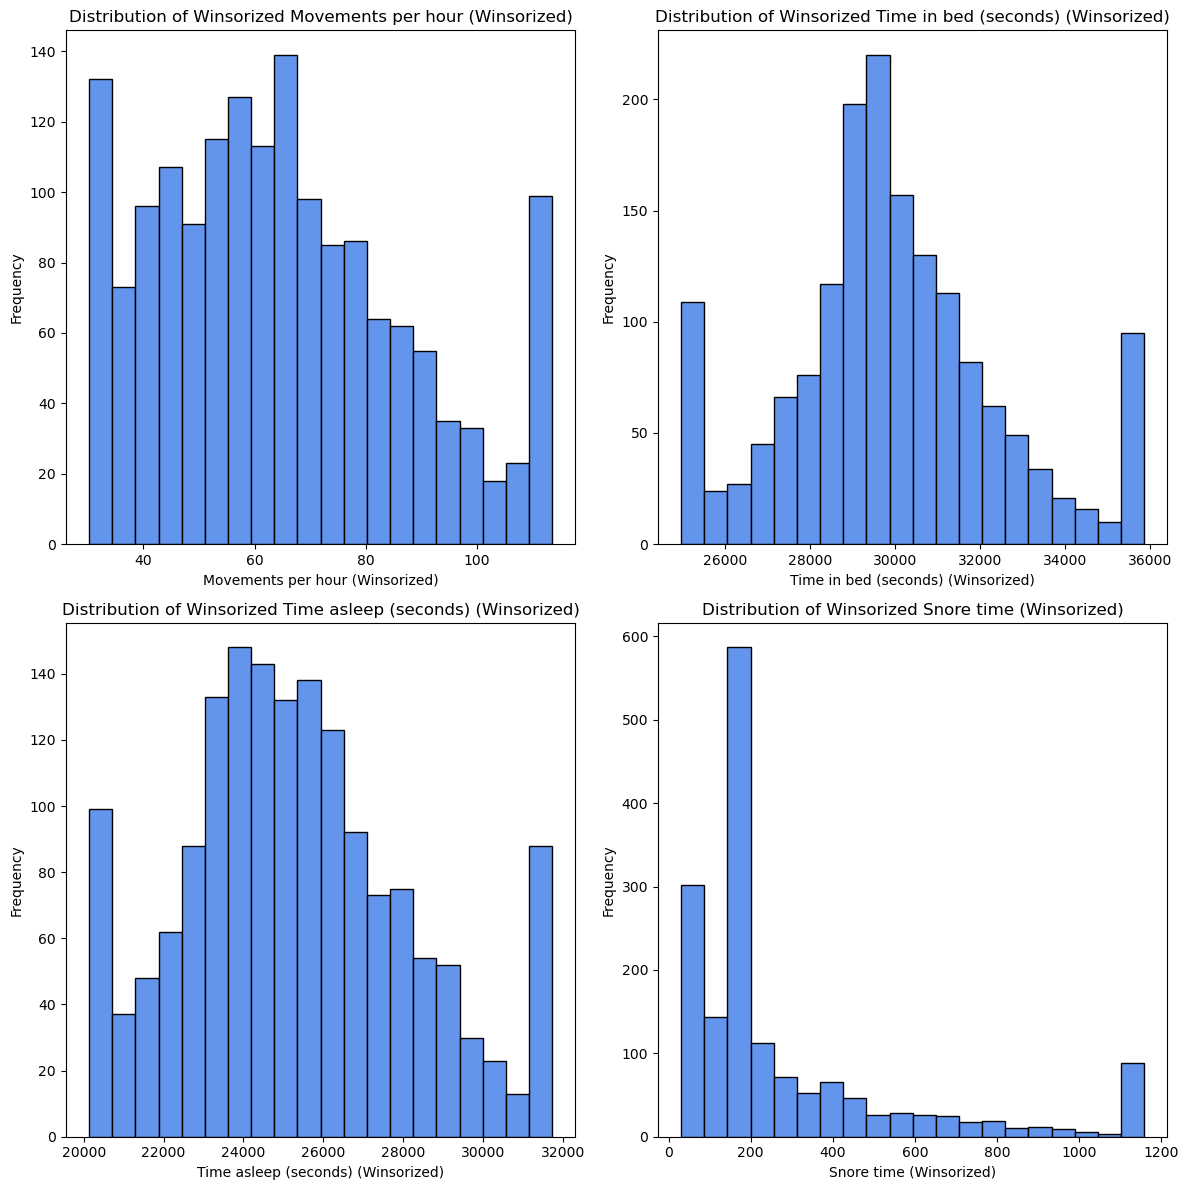

In [152]:
# Number of rows needed for the subplots
num_rows = (len(winsorized_columns) + 1) // 2  

# Create subplots with two columns and a taller aspect ratio
plt.figure(figsize=(12, 12))  

# Loop through each log-transformed column and plot the distribution
for i, column in enumerate(winsorized_columns, 1):
    plt.subplot(num_rows, 2, i)  
    transformed_df[column].hist(bins=20, color="cornflowerblue", edgecolor="black")
    plt.title(f"Distribution of Winsorized {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)  

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("winsorized_distributions.png", dpi=300, bbox_inches="tight")

# Show plots
plt.show()

In [153]:
# Compute statistics on the Winsorized columns
skewness_winsorized = transformed_df[winsorized_columns].skew()
kurtosis_winsorized = transformed_df[winsorized_columns].kurtosis()

# Combine into a DataFrame
stats_winsorized = pd.DataFrame({'Skewness': skewness_winsorized, 'Kurtosis': kurtosis_winsorized})

# Display the result
display(stats_winsorized)

,Skewness,Kurtosis
Movements per hour (Winsorized),0.475122,-0.490619
Time in bed (seconds) (Winsorized),0.310190,0.204588
Time asleep (seconds) (Winsorized),0.349316,-0.269840
Snore time (Winsorized),1.853181,2.757143


In [154]:
# Apply Log transformation (add 1 to avoid log(0) issues)
transformed_df["Movements per hour (Log)"] = np.log1p(transformed_df["Movements per hour (Winsorized)"])
transformed_df["Time in bed (Log)"] = np.log1p(transformed_df["Time in bed (seconds) (Winsorized)"])
transformed_df["Time asleep (Log)"] = np.log1p(transformed_df["Time asleep (seconds) (Winsorized)"])

In [155]:
log_winsor_columns = ["Movements per hour (Log)", "Time in bed (Log)", "Time asleep (Log)"]

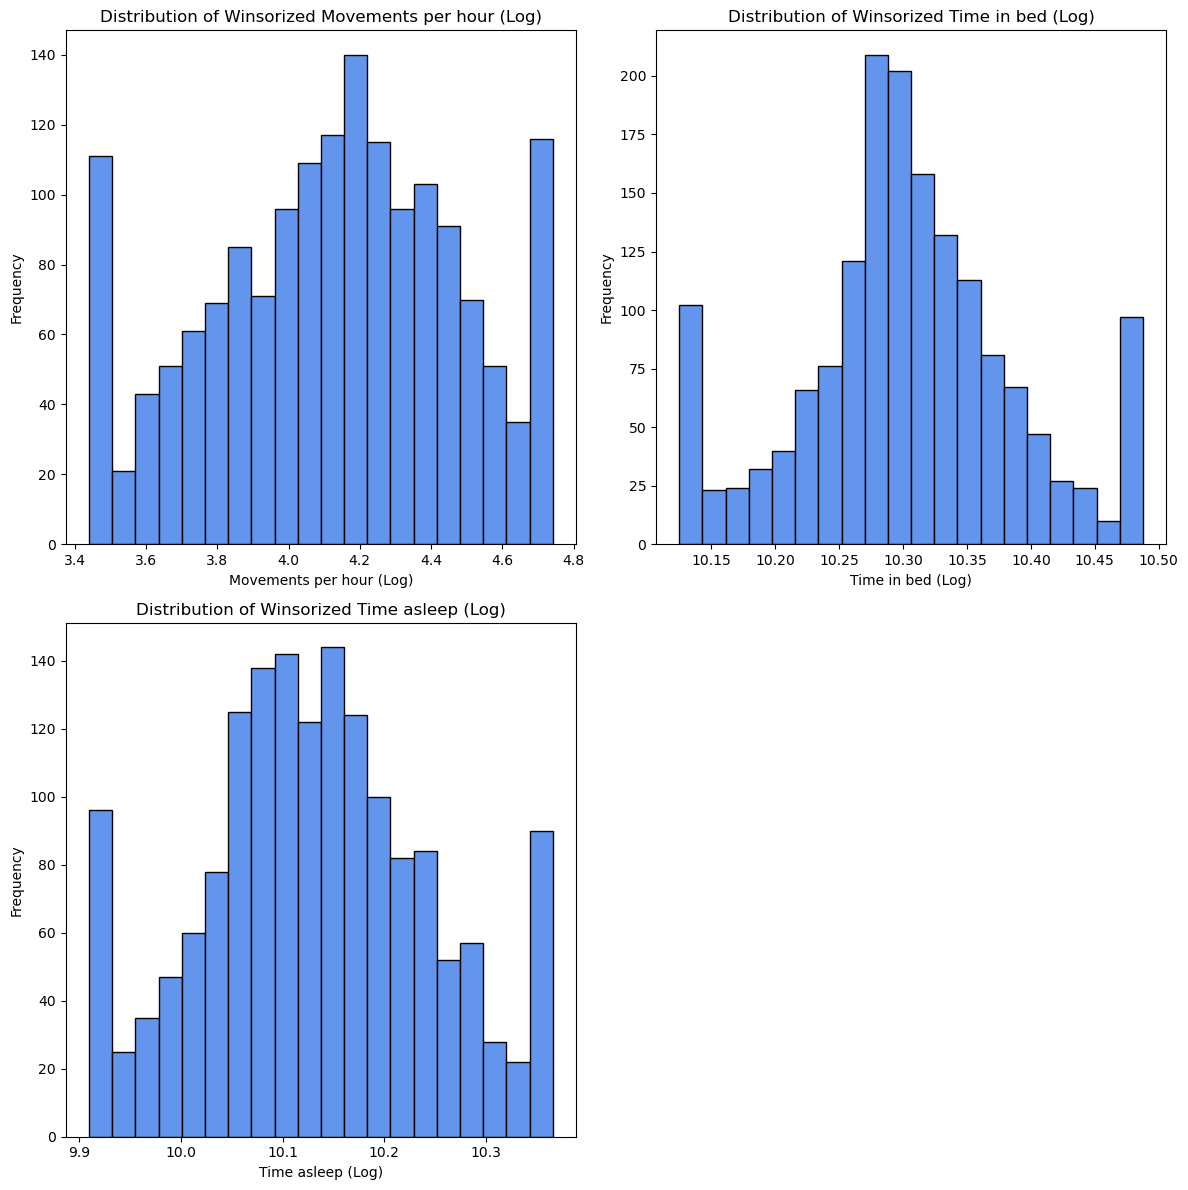

In [156]:
# Number of rows needed for the subplots
num_rows = (len(log_winsor_columns) + 1) // 2  

# Create subplots with two columns and a taller aspect ratio
plt.figure(figsize=(12, 12))  

# Loop through each log-transformed column and plot the distribution
for i, column in enumerate(log_winsor_columns, 1):
    plt.subplot(num_rows, 2, i)  
    transformed_df[column].hist(bins=20, color="cornflowerblue", edgecolor="black")
    plt.title(f"Distribution of Winsorized {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)  

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("winsor_log_distributions.png", dpi=300, bbox_inches="tight")

# Show plots
plt.show()

In [157]:
# Compute statistics on the Winsorized columns
skewness_wins_log = transformed_df[log_winsor_columns].skew()
kurtosis_wins_log = transformed_df[log_winsor_columns].kurtosis()

# Combine into a DataFrame
stats_wins_log = pd.DataFrame({'Skewness': skewness_wins_log, 'Kurtosis': skewness_wins_log})

# Display the result
display(stats_wins_log)

,Skewness,Kurtosis
Movements per hour (Log),-0.182414,-0.182414
Time in bed (Log),0.040619,0.040619
Time asleep (Log),0.076180,0.076180


In [158]:
# Compute correlation matrices
original_corr = transformed_df[["Movements per hour", "Time in bed (seconds)", "Time asleep (seconds)"]].corr()
winsorized_corr = transformed_df[["Movements per hour (Winsorized)", "Time in bed (seconds) (Winsorized)", "Time asleep (seconds) (Winsorized)"]].corr()
log_corr = transformed_df[["Movements per hour (Log)", "Time in bed (Log)", "Time asleep (Log)"]].corr()

# Display correlation matrices
display("Original Correlations:", original_corr)
display("\nWinsorized Correlations:", winsorized_corr)
display("\nLog-transformed Correlations:", log_corr)

'Original Correlations:'

,Movements per hour,Time in bed (seconds),Time asleep (seconds)
Movements per hour,1.000000,-0.052347,-0.071429
Time in bed (seconds),-0.052347,1.000000,0.933468
Time asleep (seconds),-0.071429,0.933468,1.000000


'\nWinsorized Correlations:'

,Movements per hour (Winsorized),Time in bed (seconds) (Winsorized),Time asleep (seconds) (Winsorized)
Movements per hour (Winsorized),1.000000,0.135045,0.101845
Time in bed (seconds) (Winsorized),0.135045,1.000000,0.841091
Time asleep (seconds) (Winsorized),0.101845,0.841091,1.000000


'\nLog-transformed Correlations:'

,Movements per hour (Log),Time in bed (Log),Time asleep (Log)
Movements per hour (Log),1.000000,0.153693,0.089198
Time in bed (Log),0.153693,1.000000,0.838700
Time asleep (Log),0.089198,0.838700,1.000000


In [159]:
# Correlation with target variable (mood_numeric)
target_corr = transformed_df.corr()['mood_numeric'].abs().sort_values(ascending=False)

print(target_corr)

mood_numeric                          1.000000
activity relax                        0.273827
Alarm                                 0.251450
weekday_encoded                       0.215869
activity work                         0.204496
activity Gym                          0.204050
activity Racing Thoughts              0.196692
activity reading                      0.183852
activity bad sleep                    0.172165
activity SMART                        0.168330
activity negative self talk           0.150371
activity Megan                        0.136550
activity good meal                    0.120349
activity travel                       0.114315
activity Hike                         0.113957
activity shopping                     0.110002
activity friends                      0.102366
activity date                         0.100159
activity Don’t feel good              0.099997
Sleep Quality                         0.098883
activity Pool/Water                   0.082183
Time in bed (

Correlation coefficients are still weak even after the transformations. It may be possible that the relationships are non-linear so a Random Forest model will be tested.

## Decision Tree & Random Forest

Random forest models can handle non-linear relationships. It is possible that there are non-linear relationships in the data and that is why to correlation coefficients are not significant.

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Splitting the Data

In [161]:
X = transformed_df.drop(columns=["mood_numeric"])  # Features
y = transformed_df["mood_numeric"]  # Target

In [162]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [163]:
# Initialize and train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

In [164]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average = "macro")
dt_f1_weighted = f1_score(y_test, y_pred_dt, average='weighted')

# Evaluate the model
print("Decision Tree - Accuracy:", dt_accuracy)
print("Decision Tree f1 - :", dt_f1)
print("Decision Tree f1 weighted:", dt_f1_weighted)

Decision Tree - Accuracy: 0.4350453172205438
Decision Tree f1 - : 0.4469390105604963
Decision Tree f1 weighted: 0.444423187608021


In [165]:
mood_mapping = {'awful': 1, 'bad': 2, 'meh': 3, 'good': 4, 'rad': 5}

# Reverse the mood_mapping dictionary
inverse_mood_mapping = {v: k for k, v in mood_mapping.items()}

# Convert numerical predictions back to original labels
y_pred_labels = [inverse_mood_mapping[num] for num in y_pred_dt]
y_test_labels = [inverse_mood_mapping[num] for num in y_test]

class_names = list(mood_mapping.keys())

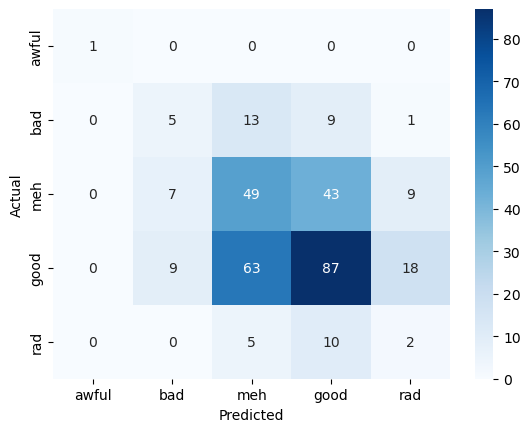

In [168]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [169]:
# Get feature importance
importances_dt = dt_model.feature_importances_

In [170]:
# Create a pandas Series with feature names and their corresponding importance
feature_importance_dt = pd.Series(importances_dt, index=X_train.columns)

# Sort the features by importance
feature_importance_dt = feature_importance_dt.sort_values(ascending=False)

print(feature_importance_dt)

Sleep Quality                         0.076480
Time before sleep (seconds)           0.065027
Time asleep (seconds) log             0.062803
Regularity                            0.048809
Time in bed (Log)                     0.043353
weekday_encoded                       0.038908
Time asleep (seconds) (Winsorized)    0.036036
Snore time (Winsorized)               0.035219
Snore time                            0.033789
Movements per hour                    0.033340
Snore time log                        0.031351
activity relax                        0.031237
Movements per hour log                0.030443
Time in bed (seconds)                 0.030336
Time asleep (seconds)                 0.028502
activity gaming                       0.024331
Time asleep (Log)                     0.023796
activity bad sleep                    0.023643
Movements per hour (Winsorized)       0.021453
Movements per hour (Log)              0.021419
activity reading                      0.020413
activity Gym 

## Random Forest

In [171]:
# Initialize and train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [172]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average = "macro")
rf_f1_weighted = f1_score(y_test, y_pred_rf, average='weighted')

# Evaluate the model
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest f1 - :", rf_f1)
print("Random Forest f1 weighted:", rf_f1_weighted)

Random Forest - Accuracy: 0.5105740181268882
Random Forest f1 - : 0.20424672793093848
Random Forest f1 weighted: 0.46696045249074347


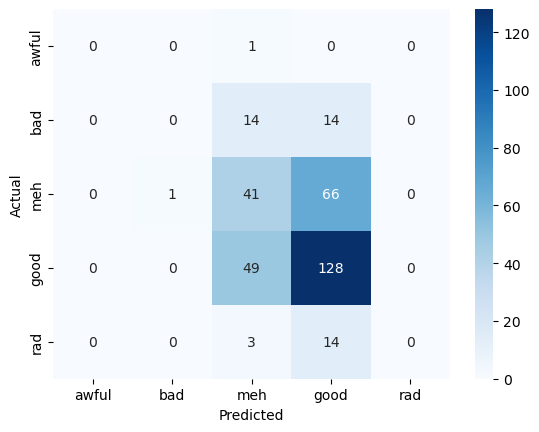

In [173]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [174]:
# Get feature importance
importances_rf = rf_model.feature_importances_

In [175]:
# Create a pandas Series with feature names and their corresponding importance
feature_importance_rf = pd.Series(importances_rf, index=X_train.columns)

# Sort the features by importance
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

print(feature_importance_rf)

Time before sleep (seconds)           0.052136
Time in bed (seconds) log             0.044998
Time asleep (seconds)                 0.044630
Movements per hour log                0.044314
Time asleep (seconds) log             0.044194
Regularity                            0.044171
Sleep Quality                         0.044164
Time in bed (seconds)                 0.043493
Movements per hour (Log)              0.042457
Movements per hour                    0.042384
Time asleep (seconds) (Winsorized)    0.040699
Time asleep (Log)                     0.039861
Time in bed (Log)                     0.039804
Time in bed (seconds) (Winsorized)    0.039638
Snore time                            0.039028
Movements per hour (Winsorized)       0.037646
Snore time log                        0.037443
Snore time (Winsorized)               0.035797
weekday_encoded                       0.029743
activity relax                        0.022729
activity reading                      0.015231
Alarm        

## Gradient Boosting

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)


In [178]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb, average = "macro")
gb_f1_weighted = f1_score(y_test, y_pred_gb, average='weighted')

# Evaluate the model
print("Gradient Booster - Accuracy:", gb_accuracy)
print("Gradient Booster f1 - :", gb_f1)
print("Gradient Booster f1 weighted:", gb_f1_weighted)

Gradient Booster - Accuracy: 0.5317220543806647
Gradient Booster f1 - : 0.24131133739935695
Gradient Booster f1 weighted: 0.4920291012070387


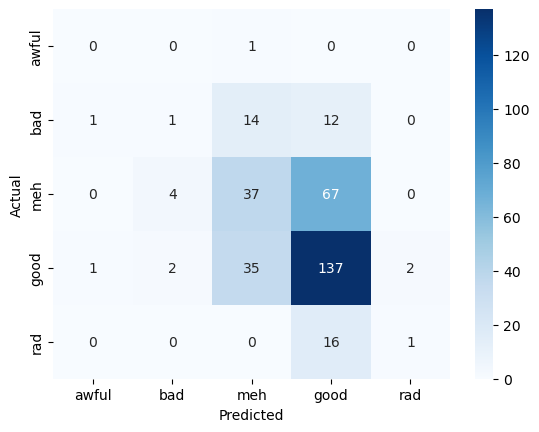

In [179]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [180]:
# Get feature importance
importances_gb = gb_model.feature_importances_

In [181]:
# Create a pandas Series with feature names and their corresponding importance
feature_importance_gb = pd.Series(importances_gb, index=X_train.columns)

# Sort the features by importance
feature_importance_gb = feature_importance_gb.sort_values(ascending=False)

print(feature_importance_gb)

Time before sleep (seconds)           0.099644
Sleep Quality                         0.070276
activity relax                        0.055808
Regularity                            0.048911
Snore time                            0.042336
Alarm                                 0.040343
activity reading                      0.037891
Time asleep (seconds)                 0.036283
Snore time log                        0.033592
Time asleep (seconds) log             0.027857
Snore time (Winsorized)               0.026495
Movements per hour log                0.026346
weekday_encoded                       0.024615
Movements per hour                    0.024259
activity bad sleep                    0.023176
Time in bed (seconds)                 0.021534
activity Megan                        0.021388
activity Racing Thoughts              0.021312
Movements per hour (Log)              0.020568
Time asleep (seconds) (Winsorized)    0.019877
Time in bed (Log)                     0.019370
Time in bed (

In [182]:
# Check the distribution of mood_encoded
print(y_train.value_counts())

mood_numeric
4.0    707
3.0    452
2.0     83
5.0     70
1.0      8
Name: count, dtype: int64


# Class Imbalance in Mood

SMOTE will be implemented in the training dataset to see if predictive capabilities of the models can be improved.

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [185]:
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [186]:
# Make predictions
y_pred_gb_SMOTE = gb_model.predict(X_test)

In [187]:
gb_SMOTE_accuracy = accuracy_score(y_test, y_pred_gb_SMOTE)
gb_SMOTE_f1 = f1_score(y_test, y_pred_gb_SMOTE, average = "macro")
gb_SMOTE_f1_weighted = f1_score(y_test, y_pred_gb_SMOTE, average='weighted')

# Evaluate the model
print("Gradient Booster + SMOTE - Accuracy:", gb_SMOTE_accuracy)
print("Gradient Booster + SMOTE f1  - :", gb_SMOTE_f1)
print("Gradient Booster + SMOTE f1 weighted:", gb_SMOTE_f1_weighted)

Gradient Booster + SMOTE - Accuracy: 0.525679758308157
Gradient Booster + SMOTE f1  - : 0.27044196475493115
Gradient Booster + SMOTE f1 weighted: 0.5119422255405962


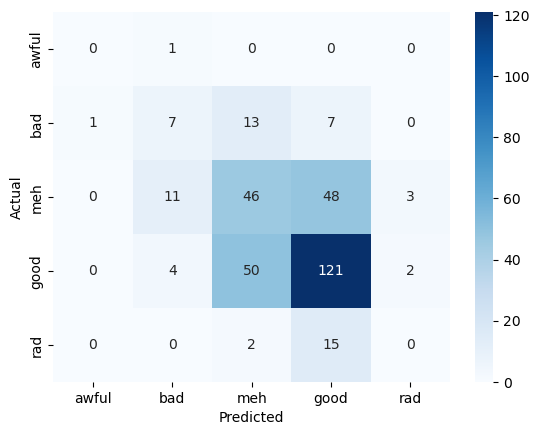

In [188]:
cm_gb_SMOTE = confusion_matrix(y_test, y_pred_gb_SMOTE)
sns.heatmap(cm_gb_SMOTE, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [189]:
from sklearn.model_selection import cross_val_score

gb_model = GradientBoostingClassifier(random_state=42)

cv_scores = cross_val_score(gb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", cv_scores.mean())

Cross-validated accuracy: 0.7963224893917963


In [190]:
from sklearn.ensemble import VotingClassifier

In [191]:
# Define your models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Create the ensemble model
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test)

print("Ensemble Model - Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Ensemble Model f1 - :", f1_score(y_test, y_pred_voting, average="macro"))
print("Ensemble Model f1 weighted:", f1_score(y_test, y_pred_voting, average='weighted'))

Ensemble Model - Accuracy: 0.5347432024169184
Ensemble Model f1 - : 0.2745246639769966
Ensemble Model f1 weighted: 0.5148339829893668


In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define your models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42, max_iter=500)  # Increased max_iter

# Create the ensemble model
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model),
                ('gb', gb_model),
               ('logreg', logreg_model)],
    voting='soft'
)

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train_resampled)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_scaled)

In [194]:
print("Ensemble Model - Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Ensemble Model f1 - :", f1_score(y_test, y_pred_voting, average="macro"))
print("Ensemble Model f1 weighted:", f1_score(y_test, y_pred_voting, average='weighted'))

Ensemble Model - Accuracy: 0.5075528700906344
Ensemble Model f1 - : 0.2897783251231527
Ensemble Model f1 weighted: 0.5074933400800679


In [195]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42, max_iter=500)  # Increased max_iter

# Create the ensemble model
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model),
                ('gb', gb_model),
               ('logreg', logreg_model)],
    voting='soft'
)

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_scaled)

In [196]:
print("Ensemble Model - Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Ensemble Model f1 - :", f1_score(y_test, y_pred_voting, average="macro"))
print("Ensemble Model f1 weighted:", f1_score(y_test, y_pred_voting, average='weighted'))

Ensemble Model - Accuracy: 0.5709969788519638
Ensemble Model f1 - : 0.27541459369817584
Ensemble Model f1 weighted: 0.5337536887566198


In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000] 
}

In [199]:
# Perform grid search for each model
rf_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
gb_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy')
logreg_search = GridSearchCV(logreg_model, logreg_param_grid, cv=5, scoring='accuracy')

In [200]:
# Fit the models
rf_search.fit(X_train_scaled, y_train)
gb_search.fit(X_train_scaled, y_train)
logreg_search.fit(X_train_scaled, y_train)

C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [500, 1000],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [201]:
# Get the best models
best_rf_model = rf_search.best_estimator_
best_gb_model = gb_search.best_estimator_
best_logreg_model = logreg_search.best_estimator_

# Create the ensemble with the best models
voting_clf_best = VotingClassifier(
    estimators=[('rf', best_rf_model),
                ('gb', best_gb_model),
                ('logreg', best_logreg_model)],
    voting='soft'
)

# Fit the ensemble model with the best estimators
voting_clf_best.fit(X_train_scaled, y_train)

C:\Users\megme\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         random_state=42)),
                             ('logreg',
                              LogisticRegression(C=0.1, max_iter=500,
                                                 random_state=42,
                                                 solver='saga'))],
                 voting='soft')

In [202]:
# Evaluate the improved ensemble model
y_pred_voting_best = voting_clf_best.predict(X_test_scaled)

print("Ensemble Model (Best Params) - Accuracy:", accuracy_score(y_test, y_pred_voting_best))
print("Ensemble Model (Best Params) f1 - :", f1_score(y_test, y_pred_voting_best, average="macro"))
print("Ensemble Model (Best Params) f1 weighted:", f1_score(y_test, y_pred_voting_best, average='weighted'))

Ensemble Model (Best Params) - Accuracy: 0.5921450151057401
Ensemble Model (Best Params) f1 - : 0.23548355424644085
Ensemble Model (Best Params) f1 weighted: 0.5350573306221608


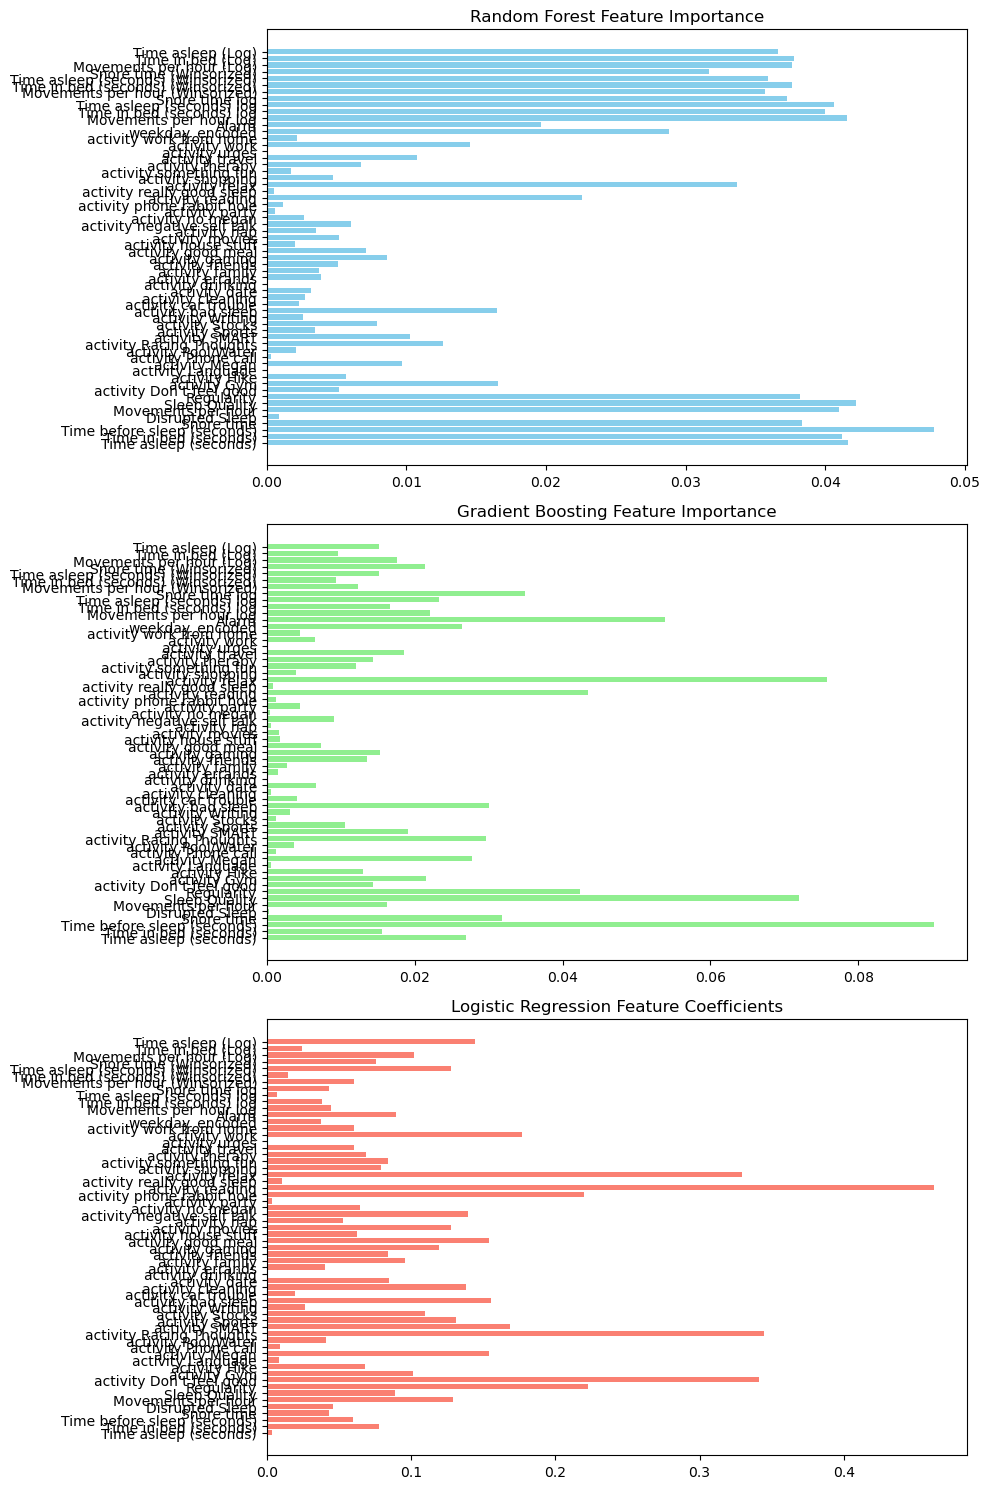

In [203]:
# Random Forest Feature Importance
rf_feature_importance = best_rf_model.feature_importances_

# Gradient Boosting Feature Importance
gb_feature_importance = best_gb_model.feature_importances_

# Logistic Regression Coefficients
logreg_feature_importance = np.abs(best_logreg_model.coef_[0])

# Combine all feature importances into one array
features = X_train.columns

# Plot the feature importances of each model
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Random Forest
ax[0].barh(features, rf_feature_importance, color='skyblue')
ax[0].set_title('Random Forest Feature Importance')

# Gradient Boosting
ax[1].barh(features, gb_feature_importance, color='lightgreen')
ax[1].set_title('Gradient Boosting Feature Importance')

# Logistic Regression
ax[2].barh(features, logreg_feature_importance, color='salmon')
ax[2].set_title('Logistic Regression Feature Coefficients')

plt.tight_layout()
plt.show()

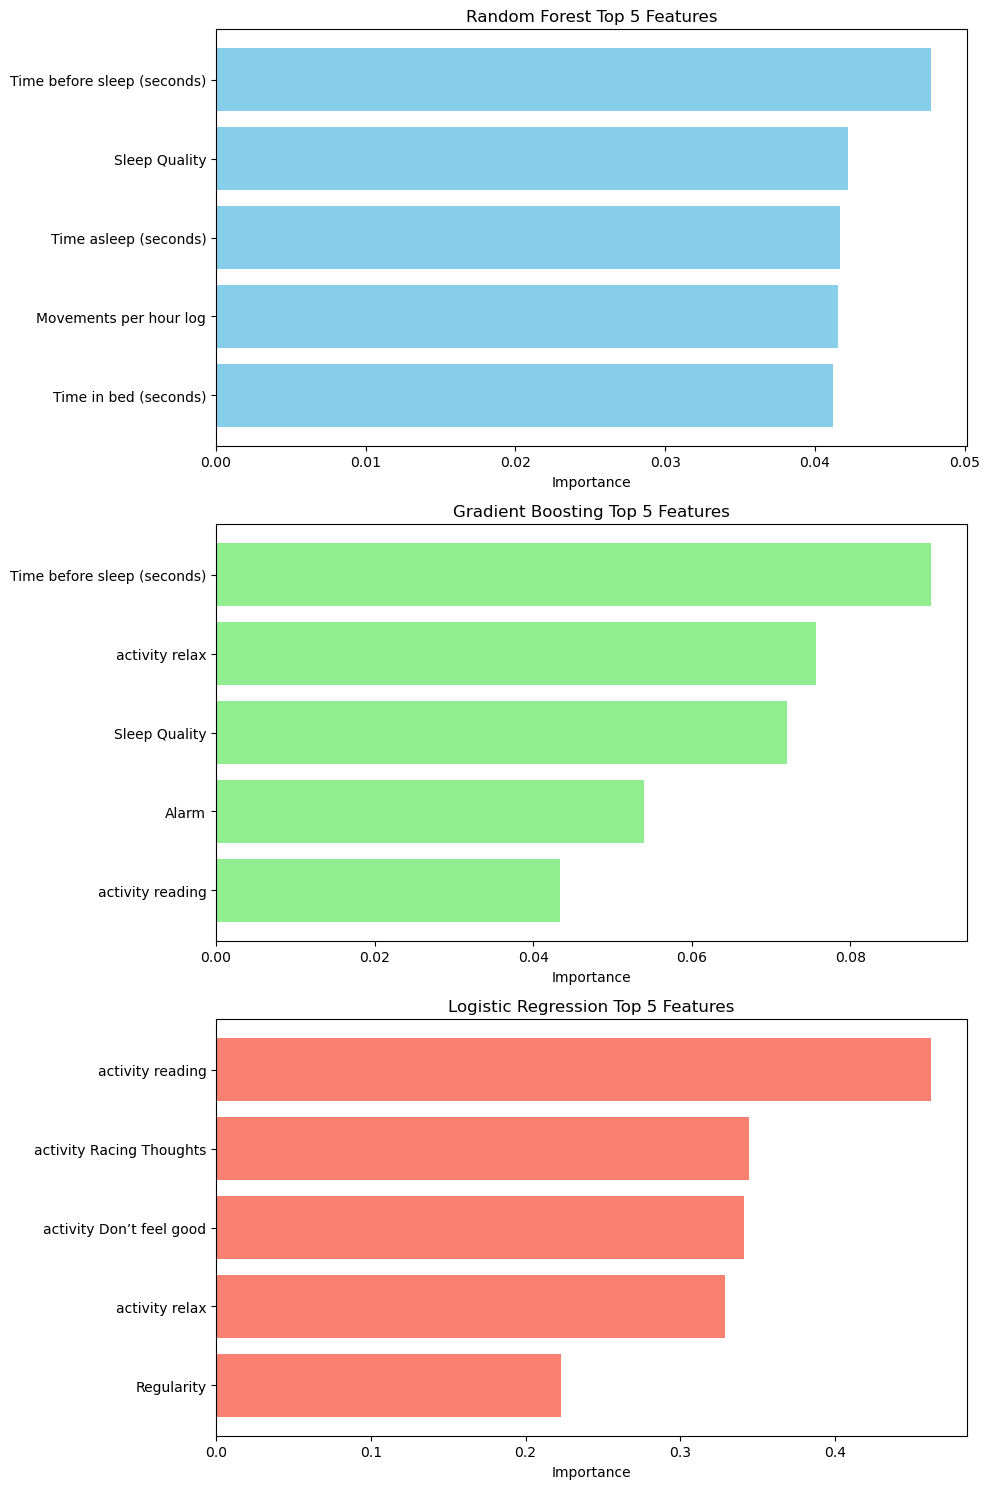

In [207]:
# Get feature names
features = np.array(X_train.columns)

# Get top 5 features for each model
def get_top_features(importances, features, model_name):
    sorted_idx = np.argsort(importances)[::-1]  # Sort in descending order
    top_features = features[sorted_idx][:5]  # Get top 5 features
    top_importances = importances[sorted_idx][:5]  # Get their scores
    return top_features, top_importances

# Get top features for each model
rf_top_features, rf_top_importances = get_top_features(best_rf_model.feature_importances_, features, "Random Forest")
gb_top_features, gb_top_importances = get_top_features(best_gb_model.feature_importances_, features, "Gradient Boosting")
logreg_top_features, logreg_top_importances = get_top_features(np.abs(best_logreg_model.coef_[0]), features, "Logistic Regression")

# Plot the top 5 features for each model
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Function to plot top features
def plot_top_features(ax, top_features, top_importances, title, color):
    ax.barh(top_features[::-1], top_importances[::-1], color=color)  # Reverse for better visualization
    ax.set_title(title)
    ax.set_xlabel("Importance")

# Plot for each model
plot_top_features(ax[0], rf_top_features, rf_top_importances, "Random Forest Top 5 Features", "skyblue")
plot_top_features(ax[1], gb_top_features, gb_top_importances, "Gradient Boosting Top 5 Features", "lightgreen")
plot_top_features(ax[2], logreg_top_features, logreg_top_importances, "Logistic Regression Top 5 Features", "salmon")


# Save the figure to the local directory 
plt.savefig("Top5featuresbar.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

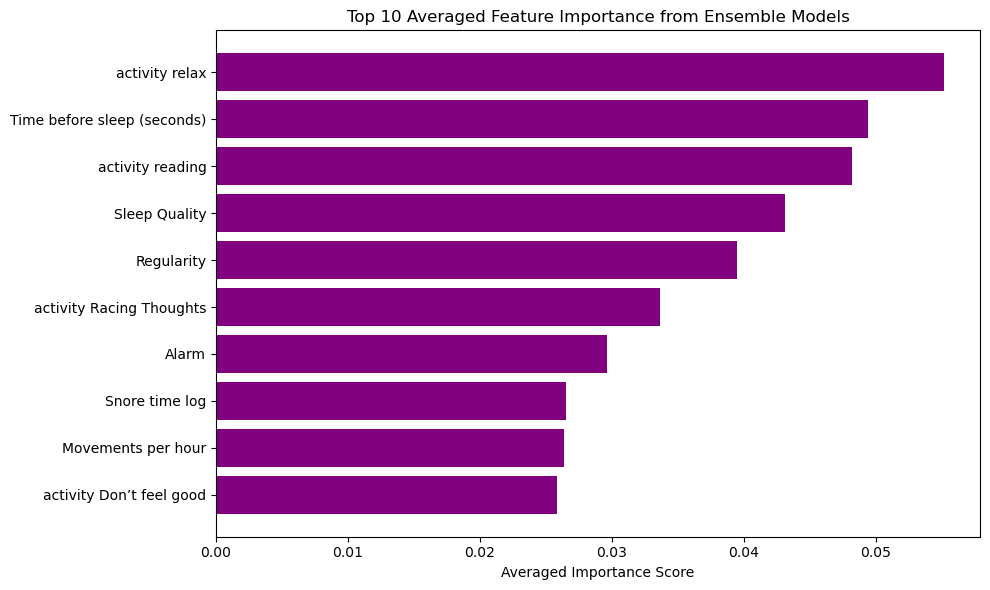

In [208]:
# Normalize feature importance
rf_normalized = rf_feature_importance / np.sum(rf_feature_importance)
gb_normalized = gb_feature_importance / np.sum(gb_feature_importance)
logreg_normalized = logreg_feature_importance / np.sum(logreg_feature_importance)

# Compute average importance
average_importance = (rf_normalized + gb_normalized + logreg_normalized) / 3

# Get top 10 features
sorted_idx = np.argsort(average_importance)[::-1]  # Sort in descending order
top_features = features[sorted_idx][:10]  # Get top 10 features
top_importances = average_importance[sorted_idx][:10]  # Get their scores

# Plot top 10 averaged feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color='purple')  # Reverse for better visualization
plt.xlabel("Averaged Importance Score")
plt.title("Top 10 Averaged Feature Importance from Ensemble Models")


# Save the figure to the local directory 
plt.savefig("top5featuresoverall.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()